In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
from IPython.display import display

In [24]:
import plotly.express as px
from IPython.display import display, HTML

In [25]:
path = os.getcwd()
files = os.listdir(path)

In [26]:
# create the new directory where every exported document will be saved

from datetime import datetime

currentDateTime= datetime.now()
currentDateTime= str(currentDateTime)

fname = 'resumeAnalisis'+' '+currentDateTime[0:4]+\
currentDateTime[5:7]+\
currentDateTime[8:10]+\
currentDateTime[11:13]+\
currentDateTime[14:16]+\
currentDateTime[17:19]+'.csv'
directory = './repro'

if not os.path.exists(directory):
    os.mkdir(directory)
                        
path2 = os.path.join(directory, fname)
#mtcarr.to_csv(str(path2), encoding='UTF-8-sig')

In [27]:
cb1 = [f for f in files if f[-4:] == 'xlsx' and f[:4] == 'bbxy']

In [28]:
cb2 = pd.DataFrame()
for f in cb1:
    datos = pd.read_excel(f)
    cb2 = pd.concat([cb2,datos], axis=0)
    
cb2 = cb2.rename(columns = {'CLV_CENTRO':'CCT','CARRERA':'CARR',
                            'GENERACION':'GEN','SEMESTRE':'SEM',
                            'GRUPO':'GPO','NO CONTROL':'NCONT',
                            'NOMBRE':'NOM','PATERNO':'PAT',
                            'MATERNO':'MAT','NOMBRE ASIGNATURA':'ASIG',
                            'NOMBRE DOCENTE':'DOC','RFC DOCENTE':'RFCDOC',
                            'PERIODO 1':'PAR1','PERIODO 2':'PAR2',
                            'PERIODO 3':'PAR3','CALIFICACION':'CALIF',
                            'ASISTENCIA PERIODO 1':'AS1','ASISTENCIA PERIODO 2':'AS2',
                            'ASISTENCIA PERIODO 3':'AS3','TIPO ACRED.':'TACRED'
                           })

In [29]:
cb3 = cb2.iloc[:,1:24]

In [30]:
cb3['NCONT'] = cb3['NCONT'].apply(str)

In [31]:
del cb3['TACRED']

In [32]:
cb3['SEX']=cb3['CURP'].str[10]

In [33]:
cb3.loc[(cb3.CARR == 'COMPONENTE BASICO Y PROPEDEUTICO'), 'CARR'] = 'CBYP'
cb3.loc[(cb3.CARR == 'TÉCNICO AGROPECUARIO') , 'CARR'] = 'TAGP'
cb3.loc[(cb3.CARR == 'TÉCNICO EN EXPLOTACIÓN GANADERA') , 'CARR'] = 'TEGN'
cb3.loc[(cb3.CARR == 'TÉCNICO EN PROGRAMACIÓN') , 'CARR'] = 'TPGM'
cb3.loc[(cb3.CARR == 'TéCNICO EN ADMINISTRACIóN DE EMPRENDIMIENTOS') , 'CARR'] = 'TAEM'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN PARA EL EMPRENDIMIENTO AGROPECUARIO') , 'CARR'] = 'TAEA'
cb3.loc[(cb3.CARR == 'TÉCNICO EN OFIMÁTICA') , 'CARR'] = 'TOFI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN VITICULTURA') , 'CARR'] = 'TVIT'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN EN MIPYMES') , 'CARR'] = 'TMPY'
cb3.loc[(cb3.CARR == 'TÉCNICO EN SOPORTE Y MANTENIMIENTO DE EQUIPO DE CÓMPUTO') , 'CARR'] = 'TSMEC'
cb3.loc[(cb3.CARR == 'TÉCNICO EN RECURSOS HÍDRICOS') , 'CARR'] = 'T_RHI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN LOGÍSTICA') , 'CARR'] = 'T_LGI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN DE RECURSOS HUMANOS') , 'CARR'] = 'T_ARH'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ACUACULTURA') , 'CARR'] = 'T_ACU'

In [34]:
cb3.loc[(cb3.CARR == 'COMPONENTE BASICO Y PROPEDEUTICO'), 'CARR'] = 'CBYP'
cb3.loc[(cb3.CARR == 'TÉCNICO AGROPECUARIO') , 'CARR'] = 'TAGP'
cb3.loc[(cb3.CARR == 'TÉCNICO EN EXPLOTACIÓN GANADERA') , 'CARR'] = 'TEGN'
cb3.loc[(cb3.CARR == 'TÉCNICO EN PROGRAMACIÓN') , 'CARR'] = 'TPGM'
cb3.loc[(cb3.CARR == 'TéCNICO EN ADMINISTRACIóN DE EMPRENDIMIENTOS') , 'CARR'] = 'TAEM'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN PARA EL EMPRENDIMIENTO AGROPECUARIO') , 'CARR'] = 'TAEA'
cb3.loc[(cb3.CARR == 'TÉCNICO EN OFIMÁTICA') , 'CARR'] = 'TOFI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN VITICULTURA') , 'CARR'] = 'TVIT'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN EN MIPYMES') , 'CARR'] = 'TMPY'
cb3.loc[(cb3.CARR == 'TÉCNICO EN SOPORTE Y MANTENIMIENTO DE EQUIPO DE CÓMPUTO') , 'CARR'] = 'TSMEC'
cb3.loc[(cb3.CARR == 'TÉCNICO EN RECURSOS HÍDRICOS') , 'CARR'] = 'T_RHI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN LOGÍSTICA') , 'CARR'] = 'T_LGI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN DE RECURSOS HUMANOS') , 'CARR'] = 'T_ARH'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ACUACULTURA') , 'CARR'] = 'T_ACU'

In [35]:
cb3.loc[cb3["ASIG"] == "TECNOLOGÍAS DE LA INFORMACIÓN Y LA COMUNICACIÓN", "ASIG"] = 'TIC'
cb3.loc[cb3["ASIG"] == "LECTURA, EXPRESIÓN ORAL Y ESCRITA I", "ASIG"] = 'LEOYE'

cb3.loc[cb3["ASIG"] == "TEMAS DE CIENCIAS DE LA SALUD", "ASIG"] = 'TCSD'
cb3.loc[cb3["ASIG"] == "Reacciones químicas, conservación de la materia en la formación de nuevas substancias.", "ASIG"] = 'RQCMFNS'
cb3.loc[cb3["ASIG"] == "Formación socioemocional IV", "ASIG"] = 'FSE IV'
cb3.loc[cb3["ASIG"] == "INTRODUCCIÓN AL DERECHO", "ASIG"] = 'INDRCHO'
cb3.loc[cb3["ASIG"] == "Conciencia histórica I. Perspectivas del México antiguo en los contextos globales", "ASIG"] = 'CNHIST_1'
cb3.loc[cb3["ASIG"] == "APOYA EN LA REALIZACIÓN DE TRÁMITES JURÍDICO-ADMINISTRATIVOS", "ASIG"] = 'APRTRJADM'
cb3.loc[cb3["ASIG"] == "Lengua y comunicación II", "ASIG"] = 'LyC II'
cb3.loc[cb3["ASIG"] == "Opera una red LAN", "ASIG"] = 'ORLAN'
cb3.loc[cb3["ASIG"] == "Ensambla e instala controladores y dispositivos periféricos", "ASIG"] = 'ENINCDPP'
cb3.loc[cb3["ASIG"] == "PARTICIPA EN LA ESTRUCTURACIÓN DEL PLAN DE NEGOCIO", "ASIG"] = 'PEPLANNEG'
cb3.loc[cb3["ASIG"] == "Colabora en la planificación, organización, dirección y control de la unidad económica", "ASIG"] = 'CPODCUNIDE'
cb3.loc[cb3["ASIG"] == "Instala una red LAN", "ASIG"] = 'IRLAN'
cb3.loc[cb3["ASIG"] == "Cálculo diferencial", "ASIG"] = 'CALCDF'
cb3.loc[cb3["ASIG"] == "PROBABILIDAD Y ESTADÍSTICA", "ASIG"] = 'PROyEST'
cb3.loc[cb3["ASIG"] == "Produce cultivos agrícolas a cielo abierto", "ASIG"] = 'PCTVCLA'
cb3.loc[cb3["ASIG"] == "Formación socioemocional II", "ASIG"] = 'FSE II'
cb3.loc[cb3["ASIG"] == "Procesa productos cárnicos", "ASIG"] = 'PPRODCARN'
cb3.loc[cb3["ASIG"] == "MATEMÁTICAS APLICADAS", "ASIG"] = 'MATAPL'
cb3.loc[cb3["ASIG"] == "Temas selectos de matemáticas I", "ASIG"] = 'SELECTMAT_I'
cb3.loc[cb3["ASIG"] == "TEMAS DE BIOLOGÍA CONTEMPORÁNEA", "ASIG"] = 'TBIOLCONT'
cb3.loc[cb3["ASIG"] == "Opera proyecto productivo agropecuario", "ASIG"] = 'OPPROYAGR'
cb3.loc[cb3["ASIG"] == "Maneja aves y otras especies alternas", "ASIG"] = 'MAVES'
cb3.loc[cb3["ASIG"] == "Maneja especies monogástricas", "ASIG"] = 'MONOGAS'
cb3.loc[cb3["ASIG"] == "Maneja especies poligástricas", "ASIG"] = 'POLIGAS'
cb3.loc[cb3["ASIG"] == "INTRODUCCIÓN A LA ECONOMÍA", "ASIG"] = 'INTECON'
cb3.loc[cb3["ASIG"] == "Registra operaciones contables de la unidad económica", "ASIG"] = 'RGCONTUECO'
cb3.loc[cb3["ASIG"] == "Cultura digital II", "ASIG"] = 'CDIGIT_II'
cb3.loc[cb3["ASIG"] == "Brinda soporte técnico a distancia", "ASIG"] = 'SOTECDIST'
cb3.loc[cb3["ASIG"] == "PARTICIPA EN LA ELABORACIÓN Y PRESENTACIÓN DEL PLAN DE MERCADOTECNIA PARA EL LANZAMIENTO UN PRODUCTO O SERVICIO", "ASIG"] = 'PMERCALNZ'
cb3.loc[cb3["ASIG"] == "Instala y configura software", "ASIG"] = 'INSTSOFT'
cb3.loc[cb3["ASIG"] == "Ciencias sociales II", "ASIG"] = 'CS_II'
cb3.loc[cb3["ASIG"] == "Ciencias sociales III", "ASIG"] = 'CS_III'
cb3.loc[cb3["ASIG"] == "APOYA EN LA IDENTIFICACIÓN DE LA MERCADOTECNIA DE UN PLAN DE NEGOCIOS", "ASIG"] = 'AMERCANEG'
cb3.loc[cb3["ASIG"] == "Elabora perfil de proyectos agropecuarios", "ASIG"] = 'EPRFPRYAGR'
cb3.loc[cb3["ASIG"] == "Brinda soporte técnico de manera presencial", "ASIG"] = 'BRSPRTPRSNC'
cb3.loc[cb3["ASIG"] == "Produce insumos orgánicos para la agricultura", "ASIG"] = 'PRIMORGAG'
cb3.loc[cb3["ASIG"] == "Procesa productos hortofrutícolas", "ASIG"] = 'PHORTOFRU'
cb3.loc[cb3["ASIG"] == "La conservación de la energía y su interacción con la materia", "ASIG"] = 'CNSENRGINTMT'
cb3.loc[cb3["ASIG"] == "Produce cultivos en agricultura protegida", "ASIG"] = 'CLTVPRTG'
cb3.loc[cb3["ASIG"] == "Procesa productos lácteos", "ASIG"] = 'PRLACTEO'
cb3.loc[cb3["ASIG"] == "PARTICIPA EN LA ELABORACIÓN DEL ESTUDIO DE MERCADO", "ASIG"] = 'PESTMERCA'
cb3.loc[cb3["ASIG"] == "TEMAS DE FÍSICA", "ASIG"] = 'TEMFIS'

cb3.loc[cb3["ASIG"] == "TEMAS DE FILOSOFÍA", "ASIG"] = 'TEMFIL'
cb3.loc[cb3["ASIG"] == "TEMAS DE CIENCIAS SOCIALES", "ASIG"] = 'TEMCS'
cb3.loc[cb3["ASIG"] == "Pensamiento matemático II", "ASIG"] = 'PM_II'
cb3.loc[cb3["ASIG"] == "Pensamiento matemático I", "ASIG"] = 'PM_I'
cb3.loc[cb3["ASIG"] == "PARTICIPA EN EL PROCESO DE LANZAMIENTO DE UN PRODUCTO O SERVICIO", "ASIG"] = 'LANZPRODSERV'
cb3.loc[cb3["ASIG"] == "Opera proyectos de desarrollo sustentable", "ASIG"] = 'OPRYDESSUST'
cb3.loc[cb3["ASIG"] == "Instala y opera redes de computadoras", "ASIG"] = 'IREDCOMP'
cb3.loc[cb3["ASIG"] == "Maneja especies pecuarias", "ASIG"] = 'ESPPECUAR'
cb3.loc[cb3["ASIG"] == "Produce cultivos para la alimentación y la industria", "ASIG"] = 'PCALTNDUST'
cb3.loc[cb3["ASIG"] == "Procesa productos agropecuarios", "ASIG"] = 'PROCESAGRO'

cb3.loc[cb3["ASIG"] == "PARTICIPA EN LA ELABORACIÓN DEL PLAN DE NEGOCIO", "ASIG"] = 'ELABNEGO'
cb3.loc[cb3["ASIG"] == "Ensambla, configura e instala hardware y software en el equipo de cómputo", "ASIG"] = 'ENHARDSOFT'
cb3.loc[cb3["ASIG"] == "Proporciona soporte técnico presencial o a distancia en software de aplicación y hardware", "ASIG"] = 'SPTECSOFTHARD'
cb3.loc[cb3["ASIG"] == "GESTIONA PROCESOS ADMINISTRATIVOS Y CONTABLES BÁSICOS DE LA UNIDAD ECONÓMICA", "ASIG"] = 'GESTADMCONTAUE'


In [36]:
data = [
    ['TIC','Tecnologías de la Información y la Comunicación'],
    ['LEOYE','Lectura, Expresión Oral y Escrita I',],
    ['TCSD','Temas de Ciencia y de la Salud'],
    ['RQCMFNS','Reacciones Químicas, Conservación de la Materia en la Formación de Nuevas Substancias'],
    ['FSE IV','Formación Socioemocional IV'],
    ['INDRCHO','Introducción al Derecho'],
    ['CNHIST I','Conciencia Histórica I'],
    ['APRTRJADM','Apoya en la Realización de Trámites Jurídico-Administrativos'],
    ['LyC II','Lengua y Comunicación II'],
    ['ORLAN','Opera una Red LAN'],
    ['ENINCDPP','Ensambla e Instala Controladores y Dispositivos Periféricos'],
    ['PEPLANNEG','Participa en la Estructuración del Plan de Negocio'],
    ['CPODCUNIDE','Colabora en la Planificación, Organización, Dirección y Control de la Unidad Económica'],
    ['IRLAN','Instala una Red LAN'],
    ['CALCDF','Cálculo Diferencial'],
    ['PROyEST','Probabilidad y Estadística'],
    ['PCTVCLA','Produce Cultivos Agrícolas a Cielo Abierto'],
    ['FSE II','Formación Socioemocional II'],
    ['PPRODCARN','Procesa Productos Cárnicos'],
    ['PPRODCARN','Procesa Productos Cárnicos'],
    ['MATAPL','Matemáticas Aplicadas'],
    ['SELECTMAT I','Temas Selectos de Matemáticas I'],
    ['TBIOLCONT','Temas de Biología Contemporánea'],
    ['OPPROYAGR','Opera Proyecto Productivo Agropecuario'],
    ['MAVES','Maneja Aves y Otras Especies Alternas'],
    ['MONOGAS','Maneja Especies Monogástricas'],
    ['POLIGAS','Maneja Especies Poligástricas'],
    ['INTECON','Introducción a la Economía'],
    ['RGCONTUECO','Registra Operaciones Contables de la Unidad Económica'],
    ['CDIGIT_II','Cultura Digital II'],
    ['PMERCALNZ','Participa en la Elaboración y Presentación del Plan de Mercadotécnia para el Lanzamiento de Producto o Servicio'],
    ['INSTSOFT','Instala y Configura Software'],
    ['CS II','Ciencias Sociales II'],
    ['CS III','Ciencias Sociales III'],
    ['AMERCANEG','Apoya en la Identificación de la Mercadotécnia en un Plan de Negocios'],
    ['SOTECDIST','Brinda soporte técnico a distancia'],
    ['EPRFPRYAGR','Elabora Perfil de Proyectos Agropecuarios'],
    ['BRSPRTPRSNC','Brinda Soporte Técnico de Manera Presencial'],
    ['PRIMORGAG','Produce Insumos Orgánicos para la Agricultura'],
    ['PHORTOFRU','Procesa Productos Hortofrutícolas'],
    ['CNSENRGINTMT','La Conservación de la Energía y su Interacción con la Materia'],
    ['CLTVPRTG','Produce Cultivos en Agricultura Protegida'],
    ['PRLACTEO','Procesa Productos Lácteos'],
    ['PESTMERCA','Participa en la Elaboración del Estudio de Mercado'],
    ['TEMFIS','Temas de Física'],
    ['TEMFIL','Temas de Filosofía'],
    ['TEMCS','Temas de Ciencias Sociales'],
    ['PM II','Pensamiento Matemático II'],
    ['PM I','Pensamiento Matemático I'],
    ['LANZPRODSERV','Participa en el Proceso de Lanzamiento de un Producto o Servicio'],
    ['OPRYDESSUST','Opera Proyectos de Desarrollo Sustentable'],
    ['IREDCOMP','Instala y Opera Redes de Computadoras'],
    ['ESPPECUAR','Maneja Especies Pecuarias'],
    ['PCALTNDUST','Produce Cultivos para la Alimentación y la Industria'],
    ['PROCESAGRO','Procesa Productos Agropecuarios'],
    ['ELABNEGO','Participa en la Elaboración del Plan de Negocio'],
    ['ENHARDSOFT','Ensambla, Configura e Instala Hardware y Software en el Equipo de Cómputo'],
    ['SPTECSOFTHARD','Proporciona Soporte Técnico Presencial o a Distancia en Software de Aplicación y Hardware'],
    ['GESTADMCONTAUE','Gestiona Procesos Administrativos y COntables Básicos de la Unidad Económica'],

       ]


In [37]:
df = pd.DataFrame(data, columns=['CODE', 'Unidad de Aprendizaje'])
df = df.reset_index()
df = df.sort_values('CODE')
df = df.reset_index()
df =  df.iloc[:,[2,3]]
glosario = df
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
    display(glosario)

CODE  \
0        AMERCANEG   
1        APRTRJADM   
2      BRSPRTPRSNC   
3           CALCDF   
4        CDIGIT_II   
5         CLTVPRTG   
6         CNHIST I   
7     CNSENRGINTMT   
8       CPODCUNIDE   
9            CS II   
10          CS III   
11        ELABNEGO   
12      ENHARDSOFT   
13        ENINCDPP   
14      EPRFPRYAGR   
15       ESPPECUAR   
16          FSE II   
17          FSE IV   
18  GESTADMCONTAUE   
19         INDRCHO   
20        INSTSOFT   
21         INTECON   
22        IREDCOMP   
23           IRLAN   
24    LANZPRODSERV   
25           LEOYE   
26          LyC II   
27          MATAPL   
28           MAVES   
29         MONOGAS   
30       OPPROYAGR   
31     OPRYDESSUST   
32           ORLAN   
33      PCALTNDUST   
34         PCTVCLA   
35       PEPLANNEG   
36       PESTMERCA   
37       PHORTOFRU   
38            PM I   
39           PM II   
40       PMERCALNZ   
41         POLIGAS   
42       PPRODCARN   
43       PPRODCARN   
44       PRIMORGAG   
45        PRLACTEO   
46      PROCESAGRO   
47         PROyEST   
48      RGCONTUECO   
49         RQCMFNS   
50     SELECTMAT I   
51       SOTECDIST   
52   SPTECSOFTHARD   
53       TBIOLCONT   
54            TCSD   
55           TEMCS   
56          TEMFIL   
57          TEMFIS   
58             TIC   

                                                                                              Unidad de Aprendizaje  
0                                             Apoya en la Identificación de la Mercadotécnia en un Plan de Negocios  
1                                                      Apoya en la Realización de Trámites Jurídico-Administrativos  
2                                                                       Brinda Soporte Técnico de Manera Presencial  
3                                                                                               Cálculo Diferencial  
4                                                                                                Cultura Digital II  
5                                                                         Produce Cultivos en Agricultura Protegida  
6                                                                                            Conciencia Histórica I  
7                                                     La Conservación de la Energía y su Interacción con la Materia  
8                            Colabora en la Planificación, Organización, Dirección y Control de la Unidad Económica  
9                                                                                              Ciencias Sociales II  
10                                                                                            Ciencias Sociales III  
11                                                                  Participa en la Elaboración del Plan de Negocio  
12                                        Ensambla, Configura e Instala Hardware y Software en el Equipo de Cómputo  
13                                                      Ensambla e Instala Controladores y Dispositivos Periféricos  
14                                                                        Elabora Perfil de Proyectos Agropecuarios  
15                                                                                        Maneja Especies Pecuarias  
16                                                                                      Formación Socioemocional II  
17                                                                                      Formación Socioemocional IV  
18                                     Gestiona Procesos Administrativos y COntables Básicos de la Unidad Económica  
19                                                                                          Introducción al Derecho  
20                                                                                     Instala y Configura Software  
21                                                                                       Introduc

In [38]:
#cb3.iloc[2038,1:15]

In [39]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
#    display(cb3[cb3['PAR1'].isnull()])

In [40]:
cb3 = cb3[cb3['PAR1'].notna()]

In [41]:
#cb3 = cb3.fillna('.')
#cb3['PAR1'] = cb3['PAR1'].apply(lambda x: int(x) if x.isdigit() else 0)

cb3.loc[cb3.PAR1 == 'AC', 'PAR1'] = 5

cb3['MAT'] = cb3['MAT'].fillna('_')
#cb3['PAR1'] = cb3['PAR1'].fillna(5)

#cb3['PAR1'] = pd.to_numeric(cb3['PAR1'])

cbx = cb3

In [42]:
tot_carreras = cbx['CARR'].nunique()
tot_carreras

4

In [43]:
#Con "a" y sus derivados asociados se obtendrá el %Rep por semestre

a = cbx.loc[(cbx['PERIODO'] =='SEMESTRAL 2 - 2024')]
a = a.groupby(['CARR','GPO','SEM'])['NCONT'].nunique()
a= a.reset_index()
a=a.rename(columns={'NCONT':'nAlumnos'})

In [44]:
#Con "b" y sus derivados asociados se obtendrá el %Rep por asignatura

b = cbx.loc[(cbx['PERIODO'] =='SEMESTRAL 2 - 2024')]
b = b.groupby(['CARR','GPO','SEM','ASIG'])['NCONT'].nunique()
b= b.reset_index()
b=b.rename(columns={'NCONT':'nAlumnos'})

In [45]:
#Con "g" y sus derivados asociados se obtendrá el %Rep por grupo

g = cbx.loc[(cbx['PERIODO'] =='SEMESTRAL 2 - 2024')]
g = g.groupby(['CARR','GPO','SEM'])['NCONT'].nunique()
g= g.reset_index()
g=g.rename(columns={'NCONT':'nAlumnos'})

In [46]:
apair = list()
for i,j,k in zip(a['CARR'],a['GPO'], a['SEM']):
    salida = i + '-' + str(k) + '-' + j
    apair.append(salida)
a['ID0'] = apair
# Hemos generado un ID para relacionar "a"

In [47]:
apair = list()
for i,j,k,l in zip(b['CARR'],b['GPO'], b['SEM'], b['ASIG']):
    salida = i + '-' + str(k) + '-' +j + '-' + l
    apair.append(salida)
b['ID1'] = apair
# Hemos generado un ID para relacionar "b"

In [48]:
apair = list()
for i,k in zip(g['CARR'],g['SEM']):
    salida = i + '-' + str(k) 
    apair.append(salida)
g['ID2'] = apair
# Hemos generado un ID para relacionar "g"

<h1 style="color:red;">DOCENTES</h1>

In [49]:
docentes = cbx['RFCDOC'].nunique()
docentes

tot_asig = df['CODE'].nunique()
tot_asig

28

58

In [50]:
cbx.groupby(['CARR','SEM'])['RFCDOC'].nunique()

CARR   SEM
TAEA   4       9
       6      11
TAEM   2       9
TAGP   2      10
       4      11
       6      10
TSMEC  2       9
       4       7
       6       9
Name: RFCDOC, dtype: int64

<h1 style="color:red;">PROMEDIOS POR GRUPO</h1>

In [51]:
meanstd = cbx.groupby(['CARR','SEM'])['PAR1'].agg(['mean','std']).round(1)
meanstd = meanstd.reset_index()
meanstd.iloc[:,2] = pd.to_numeric(meanstd.iloc[:,2]).round(1)
meanstd=meanstd.rename(columns={'mean':'PROMEDIO', 'std':'STD'})
meanstd

CARR  SEM PROMEDIO  STD
0   TAEA    4      7.6  1.6
1   TAEA    6      8.0  1.8
2   TAEM    2      7.0  1.8
3   TAGP    2      7.1  1.8
4   TAGP    4      8.1  1.9
5   TAGP    6      6.9  1.8
6  TSMEC    2      6.5  1.9
7  TSMEC    4      7.1  1.7
8  TSMEC    6      7.5  1.7

<h1 style="color:red;">MEAN</h1>

In [52]:
sts = cbx['PAR1'].agg(['mean', 'std'])
mean = round(sts.iloc[0],2)
mean
sd = round(sts.iloc[1],2)
sd

7.31

1.87

In [53]:
#display(cbx.loc[(cbx['PAR1'] <6)])

<h1 style="color:red;">PORCENTAJE DE REPROBACIÓN<br>POR CARRERA</h1>

In [54]:


al = cbx.groupby(['CARR','SEM'])['NCONT'].nunique()
al = al.reset_index()
al = al.rename(columns={al.columns[2]:'nAlumnos'})


out = cbx.loc[(cbx['CALIF']<6)]
out = out.groupby(['CARR','SEM'])['NCONT'].nunique()
out = out.reset_index()
out = out.rename(columns={out.columns[2]:'nRepro'})

out_al = al
out_al['nRepro'] = pd.Series(out['nRepro'])
out_al['Rep%'] = round((out_al.nRepro/out_al.nAlumnos)*100,1)
print('Número de alumnos (por grupo) con al menos una materia reprobada (nRepro) y el porcentaje de reprobación observado (Rep%).')
display(out_al)
tabla_reprobados = out_al
tabla_reprobados

Número de alumnos (por grupo) con al menos una materia reprobada (nRepro) y el porcentaje de reprobación observado (Rep%).


CARR  SEM  nAlumnos  nRepro  Rep%
0   TAEA    4        13       3  23.1
1   TAEA    6        17       8  47.1
2   TAEM    2        31      24  77.4
3   TAGP    2        37      18  48.6
4   TAGP    4        56      11  19.6
5   TAGP    6        34      25  73.5
6  TSMEC    2        29      21  72.4
7  TSMEC    4        16      10  62.5
8  TSMEC    6        24      11  45.8

CARR  SEM  nAlumnos  nRepro  Rep%
0   TAEA    4        13       3  23.1
1   TAEA    6        17       8  47.1
2   TAEM    2        31      24  77.4
3   TAGP    2        37      18  48.6
4   TAGP    4        56      11  19.6
5   TAGP    6        34      25  73.5
6  TSMEC    2        29      21  72.4
7  TSMEC    4        16      10  62.5
8  TSMEC    6        24      11  45.8

In [55]:
# CHECK PROOF

proof1 = cbx.loc[(cbx['CARR']=='TAGP')&(cbx['CALIF'] < 6)&(cbx['SEM']==2)]['NCONT'].nunique()
proof1b = cbx.loc[(cbx['CARR']=='TAGP')&(cbx['SEM']==2)]['NCONT'].nunique()

print(round((proof1/proof1b)*100,2), ' TSMEC')

48.65  TSMEC


In [56]:
"""

# ploteo por semestre
out_al['SEM'] = out_al['SEM']
graph = sns.FacetGrid(out_al, col ='CARR', hue='SEM',height=3.5,aspect=0.3).set(xticklabels=[])

# map the above form facetgrid with some attributes
graph.map(plt.bar, 'SEM', 'Rep%', label ='Rep%')
graph.set_titles(row_template = '{row_name}', col_template = '{col_name}')
graph.set_axis_labels("SEM", "Reprobación (%)")
graph.add_legend()
plt.ylim(0,80)
plt.show()

"""

'\n\n# ploteo por semestre\nout_al[\'SEM\'] = out_al[\'SEM\']\ngraph = sns.FacetGrid(out_al, col =\'CARR\', hue=\'SEM\',height=3.5,aspect=0.3).set(xticklabels=[])\n\n# map the above form facetgrid with some attributes\ngraph.map(plt.bar, \'SEM\', \'Rep%\', label =\'Rep%\')\ngraph.set_titles(row_template = \'{row_name}\', col_template = \'{col_name}\')\ngraph.set_axis_labels("SEM", "Reprobación (%)")\ngraph.add_legend()\nplt.ylim(0,80)\nplt.show()\n\n'

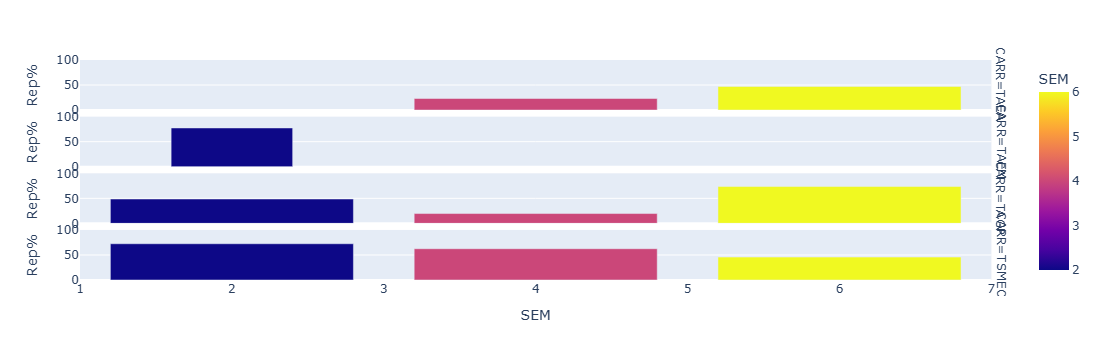

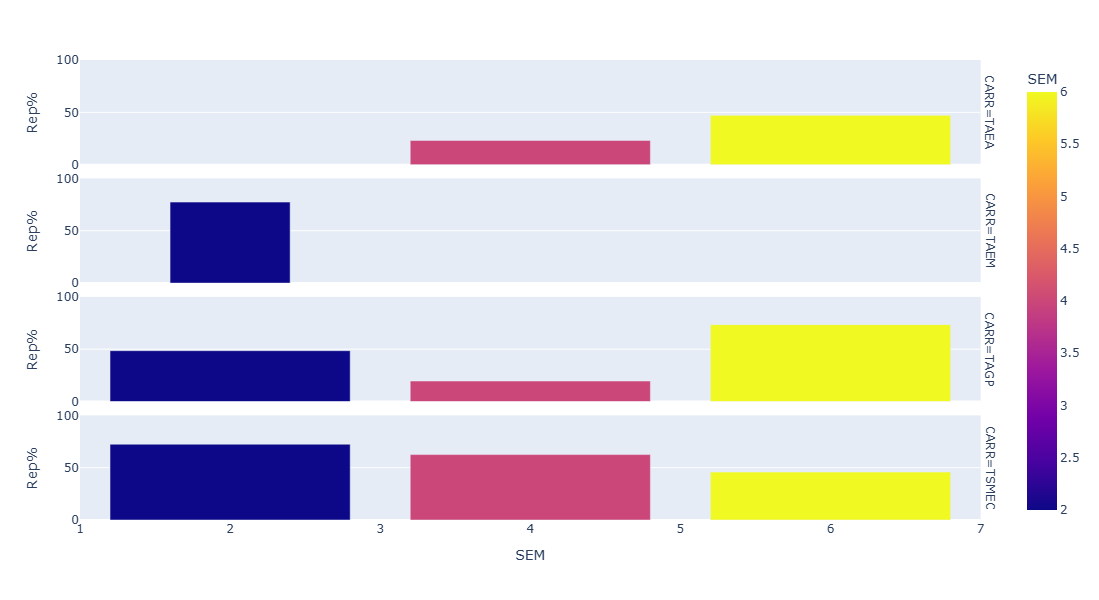

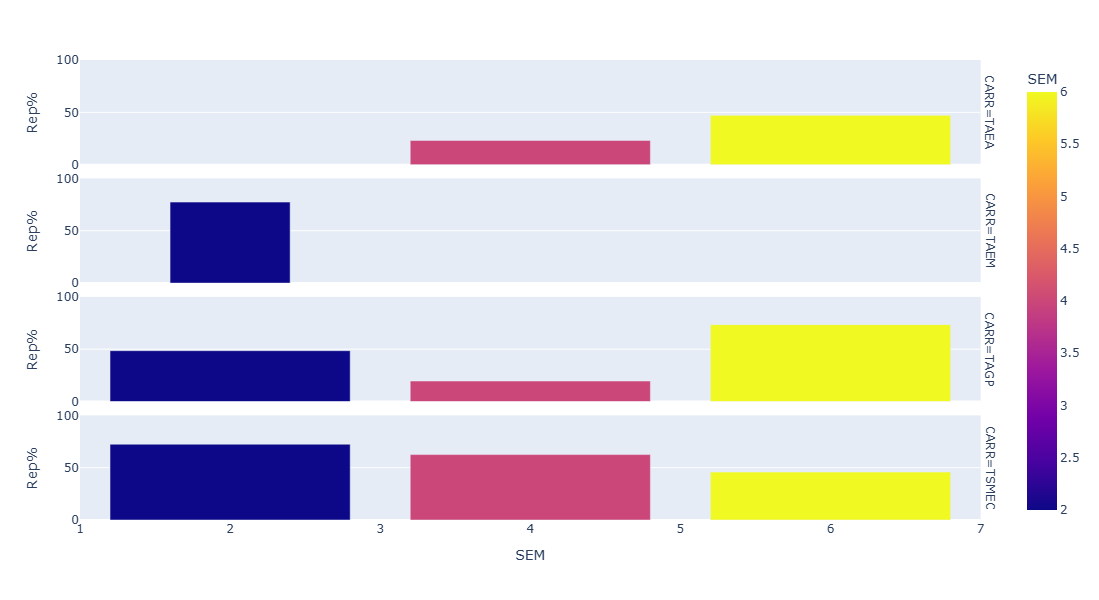

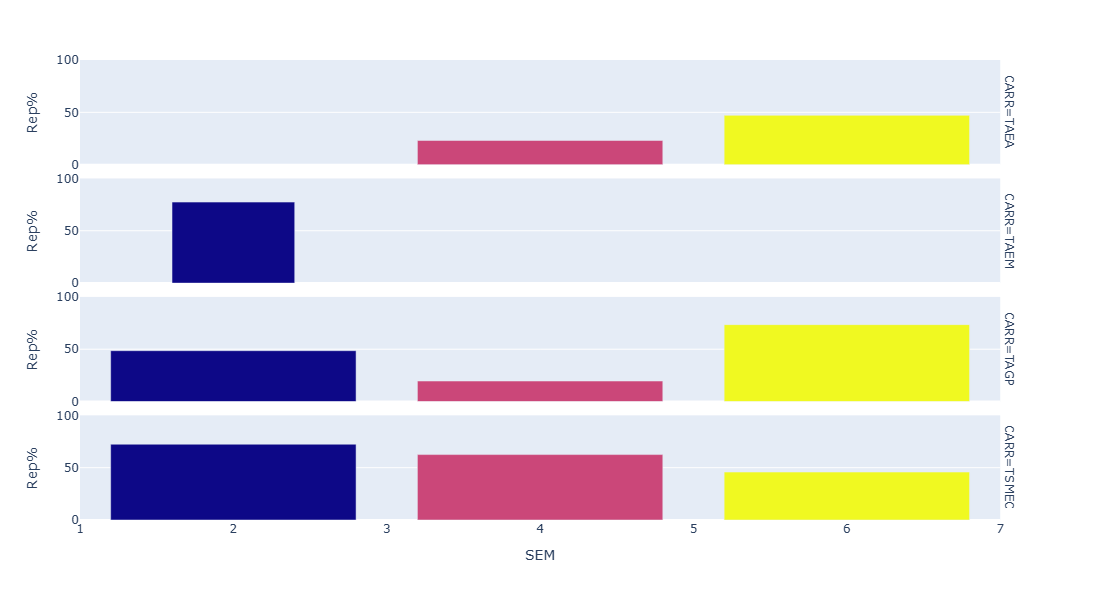

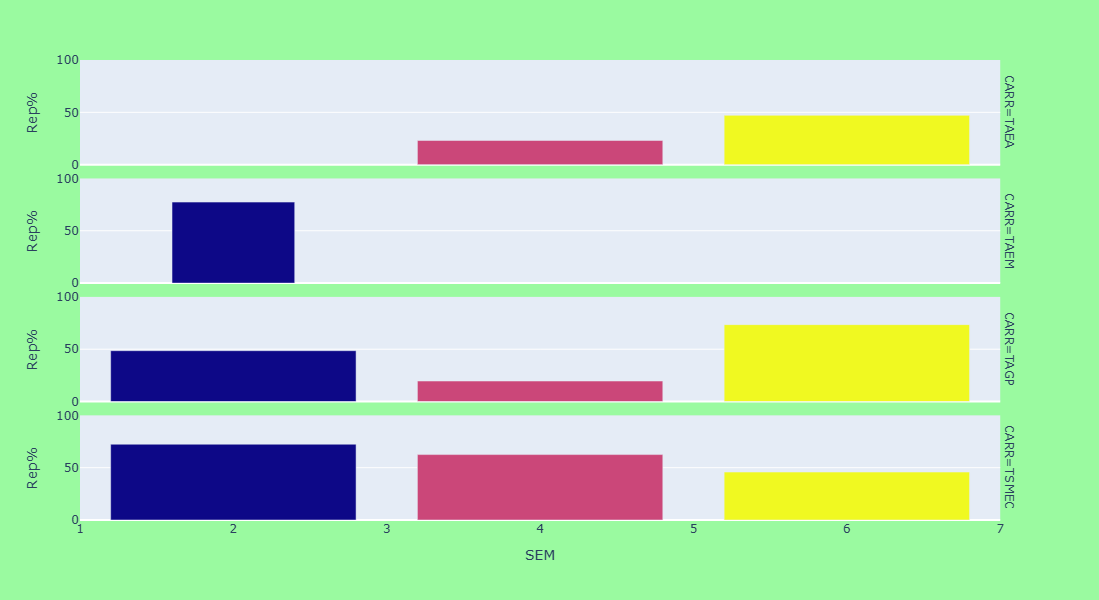

In [57]:
fig2 = px.bar(tabla_reprobados, x="SEM", y="Rep%", color = "SEM", facet_row="CARR")
fig2.update_yaxes(range=[0, 100])
fig2.update_layout(width=400, height=600)
fig2.update_layout(showlegend=False)
fig2.update_coloraxes(showscale=False)
fig2.update_layout(paper_bgcolor='#9afaa0') 

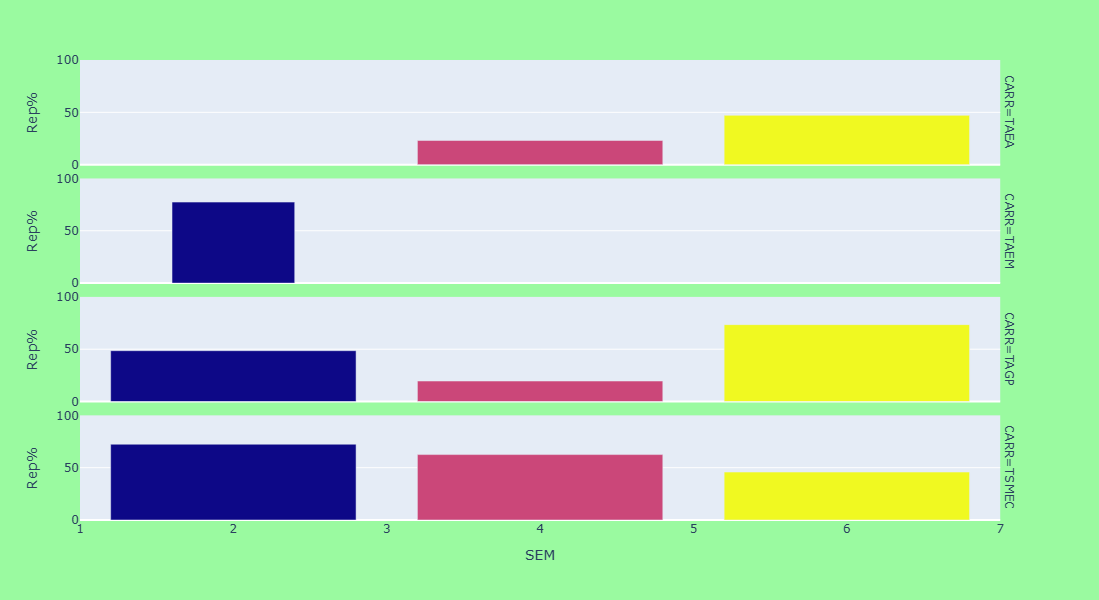

In [58]:
fig2.show()

In [59]:
apair = list()
for i,j in zip(out['CARR'], out['SEM']):
    salida = i + '-' + str(k) 
    apair.append(salida)
out['ID3'] = apair
# Hemos generado un ID para relacionar "g"

In [60]:
out = pd.merge(g, out, left_on='ID2', right_on='ID3', how='right').drop('ID2', axis=1)
out['nRepro'] = round((out.nRepro/out.nAlumnos)*100,1)
out = out.rename(columns={'SEM_y':'SEM'})


In [61]:
down =cbx.loc[cbx['CALIF']<6]

apair = list()
for i,j,k,l in zip(down['NCONT'],down['PAT'],down['MAT'], down['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
down['NOMINE']=apair

down =down.groupby(['CARR','GPO','NOMINE']).agg({'NCONT':'count'})
down=down.rename(columns={'NCONT':'CONT'})

down = down.reset_index()
down['idx']=[f"{a} {b}" for a,b in zip(down.NOMINE,down.GPO)]

C:\Users\reneb\AppData\Local\Temp\ipykernel_25520\2763956285.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
"""

print('Número de asignaturas reprobadas por cada uno de los 131 alumnos en reprobación.')
down2 = down.iloc[:,[0,4,3]].sort_values('CONT',ascending=False).loc[:,['idx','CARR','CONT']].sort_values('CONT',ascending=False)
down2 = down2.reset_index()
down2 = down2.rename(columns={'CONT':'Materias reprobadas'})
down2 = down2.iloc[:,[1,2,3]]
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
    display(down2)

"""

"\n\nprint('Número de asignaturas reprobadas por cada uno de los 131 alumnos en reprobación.')\ndown2 = down.iloc[:,[0,4,3]].sort_values('CONT',ascending=False).loc[:,['idx','CARR','CONT']].sort_values('CONT',ascending=False)\ndown2 = down2.reset_index()\ndown2 = down2.rename(columns={'CONT':'Materias reprobadas'})\ndown2 = down2.iloc[:,[1,2,3]]\nwith pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also\n    display(down2)\n\n"

In [63]:
asigna =cbx.loc[cbx['CALIF']<18]

apair = list()
for i,j,k,l in zip(asigna['NCONT'],asigna['PAT'],asigna['MAT'], asigna['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
asigna['NOMINE']=apair

asigna =asigna.groupby(['CARR','GPO','NCONT','NOMINE']).agg({'ASIG':'count'})
asigna=asigna.rename(columns={'ASIG':'ASIGS'})

asigna = asigna.reset_index()
asigna['idy']=[f"{a} {b}" for a,b in zip(asigna.NOMINE,asigna.GPO)]
#destacados['perc']=round((destacados.CONT/destacados.ASIGS)*100,1)

C:\Users\reneb\AppData\Local\Temp\ipykernel_25520\550432099.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
# CANTIDAD DE ALUMNOS CON REGISTRO DE CALIFICACIÓN EN CByP USANDO XLSX PARCIAL 2

matricula = len(cbx['NCONT'].unique())
matricula

256

<h1 style="color:red;">ALUMNOS EN RIESGO</h1>

In [115]:
meet = pd.merge(down, asigna, left_on='idx', right_on='idy', how='left').drop('idy', axis=1)

meet['%'] = round((meet.CONT/meet.ASIGS)*100,1)
meet['Ratio'] = meet['CONT'].map(str) + '/' + meet['ASIGS'].map(str)
meet = meet.rename(columns={'NOMINE_y':'NOMINE'})
meet =meet.loc[meet['%']>40].sort_values(['%'],ascending=False)
meet = meet.reset_index()

alumnos_en_riesgo = meet.loc[:,['idx','%','Ratio']]
alumnos_en_riesgo = alumnos_en_riesgo.rename(columns={'idx':'NOM'})
en_riesgo = len(alumnos_en_riesgo)
en_riesgo

print('Hay 57 alumnos con más del 40% de sus asignaturas reprobadas, de los cuales 9 reprobaron todas las materias. Por ejemplo: AVALOS ESCOBAR NANCY LIZBETH reprobó 6 de las 6 materias que cursa, es decir, reprobó el 100% de sus asignaturas. Para fines de este documento, llamaremos a estos alumnos "Alumnos rezagados".')

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
     display(alumnos_en_riesgo)



57

Hay 57 alumnos con más del 40% de sus asignaturas reprobadas, de los cuales 9 reprobaron todas las materias. Por ejemplo: AVALOS ESCOBAR NANCY LIZBETH reprobó 6 de las 6 materias que cursa, es decir, reprobó el 100% de sus asignaturas. Para fines de este documento, llamaremos a estos alumnos "Alumnos rezagados".


NOM      % Ratio
0          22101012050068-AVALOS ESCOBAR NANCY LIZBETH 6A  100.0   6/6
1        23101012050043-CARRILLO PEREZ CRISTIAN DANIEL 2A  100.0   8/8
2              21101012050062-LEYVA PAZ ALEXIS RICARDO 6A  100.0   6/6
3           22101012050058-ORTIZ VALADEZ JESUS EDUARDO 6A  100.0   6/6
4        22101012050093-RIVERA CASTAÑON CARLOS ALBERTO 6A  100.0   6/6
5          24101012050009-PALACIOS PEREZ WILLIAM JARET 2A  100.0   9/9
6         23101012050079-RAMIREZ VALADEZ LUIS FERNANDO 2A  100.0   1/1
7         24101012050115-PAZ BALANDRAN SAORY GUADALUPE 2A  100.0   8/8
8     23101012050053-ESCOBAR HINOJOSA HASHLEY JOSELYNE 4A  100.0   8/8
9            24101012050116-PEREZ PALACIOS ANGEL DAVID 2A   88.9   8/9
10              24101012050023-VARGAS _ NAYLEA JEREIMY 2A   87.5   7/8
11      24101012050031-PAZ RODRIGUEZ ESTEFANY MILAGROS 2A   87.5   7/8
12       24101012050003-JIMENEZ CASTORENA EDWIN ADRIAN 2A   87.5   7/8
13            24101012050079-GONZALEZ HERNANDEZ HECTOR 2A   87.5   7/8
14                   23101012050015-LOPEZ _ LUIS ANGEL 4A   87.5   7/8
15               22101012050105-REYES _ ABRAHAM MISAEL 6A   83.3   5/6
16          24101012050083-LUEVANO ORTIZ DAVID RICARDO 2A   75.0   6/8
17         23101012050104-PULIDO MENDEZ MONICA LIZBETH 4A   71.4   5/7
18        22101012050110-CANDELAS GOMEZ KAROLL EDUARDO 6A   66.7   4/6
19        22101012050103-GURROLA MARTINEZ OSCAR DANIEL 6A   66.7   4/6
20          22101012050030-DE LUNA VARGAS DEISY PAMELA 6A   66.7   4/6
21            22101012050074-GUTIERREZ BAEZ JOSE ANGEL 6A   66.7   4/6
22        24101012050034-PEREZ CONTRERAS ERICK JOSHUHA 2A   66.7   6/9
23        23101012050065-SUAREZ VALENCIANO ALAN ALEXIS 4A   62.5   5/8
24       24101012050103-SANTANA AMADOR ARGELIA SOLENYI 2A   62.5   5/8
25                    24101012050038-MACIAS PEREZ SAUL 2A   62.5   5/8
26            24101012050061-FLORES LOPEZ AARON MICHEL 2A   62.5   5/8
27       24101012050042-SANDOVAL LOPEZ JUANA GUADALUPE 2A   62.5   5/8
28              24101012050035-DIAZ YAÑEZ YEINA NAHOMY 2A   62.5   5/8
29        24101012050027-LOPEZ MARTINEZ DIEGO DE JESUS 2A   62.5   5/8
30              23101012050042-ROMO AVILA JUAN RICARDO 4A   62.5   5/8
31       24101012050021-RODRIGUEZ BERNAL JOHANA LIZETH 2A   62.5   5/8
32    24101012050087-AGUILAR RANGEL KIMBERLY GUADALUPE 2A   62.5   5/8
33            23101012050014-IBARRA FLORES ALAN ANDREI 4A   62.5   5/8
34                  23101012050001-ACOSTA DIAZ ABRAHAM 4A   62.5   5/8
35       24101012050050-MONTIEL VARGAS VERONICA XIMENA 2A   55.6   5/9
36     24101012050070-DE LUNA RODRIGUEZ JUSTIN ALBERTO 2A   55.6   5/9
37         24101012050106-DE LA TORRE _ TRIGO DE JESUS 2A   55.6   5/9
38          24101012050057-REYES ESPARZA KEVIN ALBERTO 2A   50.0   4/8
39          22101012050051-HERNANDEZ CAMPOS JUAN RUBEN 6A   50.0   3/6
40             22101012050047-GONZALEZ ORTIZ LUIS OMAR 6A   50.0   3/6
41            24101012050029-PALACIO ORTIZ JOSE JAVIER 2A   50.0   4/8
42          24101012050110-LOPEZ RUVALCABA AXEL DANIEL 2A   50.0   4/8
43         22101012050008-HERNANDEZ GARCIA JOSE MANUEL 6A   50.0   3/6
44        24101012050093-HERRERA GONZALEZ ELIHU RAMSES 2A   50.0   4/8
45       24101012050076-ORTIZ RODRIGUEZ JUAN ADALBERTO 2A   50.0   4/8
46    22101012050112-MARTINEZ ESPARZA ANDREA ESTEFANIA 6A   50.0   3/6
47          22101012050063-ALVARADO RUIZ JURITZY ANAHY 6A   50.0   3/6
48             22101012050077-ARANDA MATA DEISY NATALY 6A   50.0   3/6
49                   24101012050072-REYES REYES CAMILA 2A   50.0   4/8
50         22101012050078-MARTINEZ GONZALEZ JOSE DAVID 6A   50.0   3/6
51   23101012050034-PADILLA ESQUEDA ANDERSON ALEXANDER 2A   50.0   3/6
52     22101012050037-PUENTES DE LA CRUZ VANESSA SINAI 6A   50.0   3/6
53  24101012050104-BUENRROSTRO MORENO DANIEL ALEXANDRO 2A   44.4   4/9
54          24101012050033-CASTORENA SEGURA ROSA ELENA 2A   44.4   4/9
55        23101012050033-MACIAS PADILLA ERICK FERNANDO 4A   42.9   3/7
56     

In [116]:
todas = len(alumnos_en_riesgo[alumnos_en_riesgo['%']== 100])

In [67]:
riesgo_perc= round((en_riesgo/matricula)*100,2)
riesgo_perc

22.27

In [68]:
"""

arep1 = cbx.loc[(cbx['CALIF']<=5) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1 = arep1.groupby(['CARR','SEM','GPO','PAT','MAT','NOM'])['CURP'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'CURP':'nCasos'})
arep1=arep1.sort_values(['nCasos'],ascending=False)
arep1 = arep1.reset_index()
arep1 = arep1.iloc[:,[1,2,3,4,5,6,7]]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(arep1)

"""

"\n\narep1 = cbx.loc[(cbx['CALIF']<=5) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]\narep1 = arep1.groupby(['CARR','SEM','GPO','PAT','MAT','NOM'])['CURP'].count()\narep1 = arep1.reset_index()\narep1=arep1.rename(columns={'CURP':'nCasos'})\narep1=arep1.sort_values(['nCasos'],ascending=False)\narep1 = arep1.reset_index()\narep1 = arep1.iloc[:,[1,2,3,4,5,6,7]]\nwith pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also\n    display(arep1)\n\n"

In [69]:
arep1 = cbx.loc[(cbx['CALIF']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1 = arep1.groupby(['CARR','GPO','SEM','PAT','MAT','NOM'])['NCONT'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'NCONT':'nCasos'})
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(arep1.sort_values(['CARR','SEM','GPO','PAT']))

In [70]:
apair = list()
for i,j,k in zip(arep1['CARR'],arep1['GPO'], arep1['SEM']):
    salida = i + '-' + str(k) + '-' + j
    apair.append(salida)
arep1['ID2']=apair
# Hemos generado un ID para "arep1"

In [71]:
# Relacionaremos "a" con "arep1" a través de sus ID's
# calcularemos el % reprobación por semestre

#arep2 = pd.concat([a, arep1],axis=1, join = 'inner')
arep2 = pd.merge(a, arep1, left_on='ID0', right_on='ID2', how='right').drop('ID0', axis=1)
arep2['REP_SEM'] = round((arep2.nCasos/arep2.nAlumnos)*100,1)
arep2 = arep2.rename(columns={'SEM_y':'SEM'})


In [72]:
arep2 = arep2.rename(columns={'CARR_x':'CARR','GPO_y':'GPO'})
arep2.drop(['CARR_y','GPO_x','SEM_x'], inplace=True,axis=1)

In [73]:
# Extraer todas las calificaciones reprobatorias de n-2024 y agrupar por asignatura

arep1b = cbx.loc[(cbx['CALIF']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1b = arep1b.groupby(['CARR','GPO','SEM','ASIG'])['NCONT'].nunique()
arep1b = arep1b.reset_index()
arep1b=arep1b.rename(columns={'NCONT':'nCasos'})

In [74]:
apair = list()
for i,j,k,l in zip(arep1b['CARR'],arep1b['GPO'], arep1b['SEM'], arep1b['ASIG']):
    salida = i + '-' + str(k) + '-' +j + '-' + l
    apair.append(salida)
arep1b['ID3']=apair

# Hemos generado in ID para arep1b

In [75]:
# Relacionaremoso "b" con "arep1b" a través de sus campos ID's
# obtendremos el % de reprobación por asignatura

arep2b = pd.merge(b, arep1b, left_on='ID1', right_on='ID3', how='right').drop('ID1', axis=1)
arep2b['REP_ASIG'] = round((arep2b.nCasos/arep2b.nAlumnos)*100,1)
arep2b = arep2b.rename(columns={'SEM_y':'SEM'})
arep2b = arep2b.rename(columns={'CARR_x':'CARR','GPO_y':'GPO','ASIG_x':'ASIG'})
arep2b.drop(['CARR_y','GPO_x','SEM_x','ASIG_y'], inplace=True,axis=1)

In [76]:
cbx.columns

Index(['PLANTEL', 'CARR', 'GEN', 'TURNO', 'SEM', 'GPO', 'NCONT', 'NOM', 'PAT',
       'MAT', 'CURP', 'ASIG', 'DOC', 'RFCDOC', 'PAR1', 'PAR2', 'PAR3', 'CALIF',
       'AS1', 'AS2', 'AS3', 'PERIODO', 'SEX'],
      dtype='object')

In [95]:
cbx_par1.iloc[:,5]

0       9.0
1       9.0
2       8.0
3       8.0
4       8.0
       ... 
2033    7.0
2034    9.0
2035    9.0
2036    9.0
2037    9.0
Name: mean, Length: 2038, dtype: object

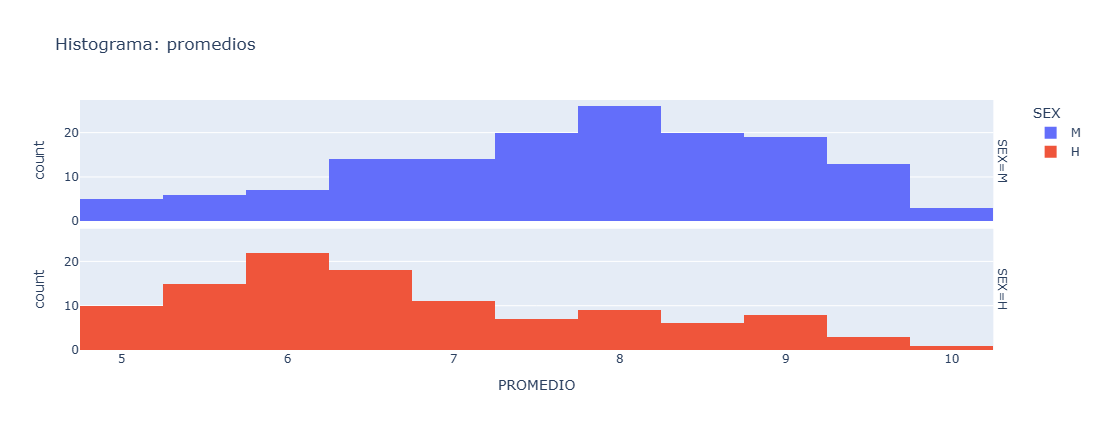

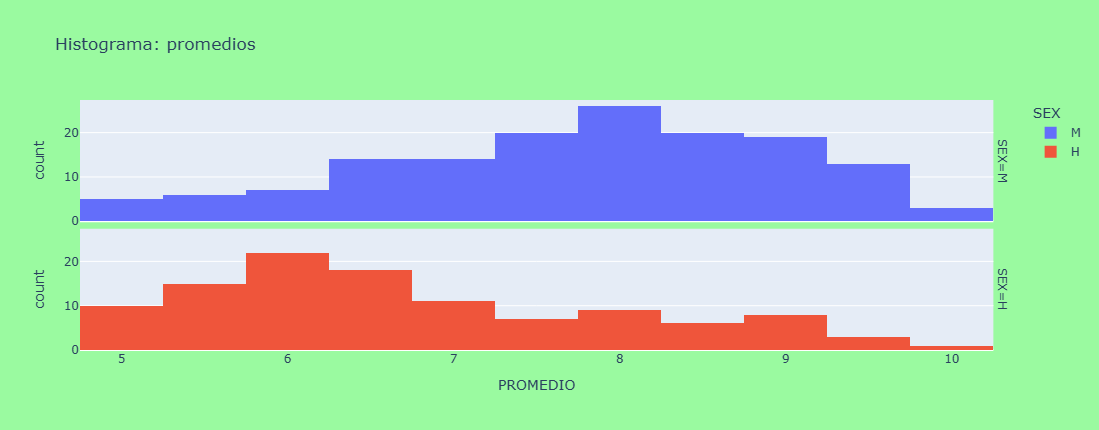

'\n# plot:\nfig, ax = plt.subplots()\n\nax.hist(cbx_par1.iloc[:,5], bins=5, linewidth=0.5, edgecolor="white", color="SEX")\n\nax.set(xlim=(4, 11), xticks=np.arange(4, 11))\n\nplt.show()\n'

In [221]:
cbx_par1 = cbx.groupby(['CARR','SEM','CURP','SEX'])['PAR1'].agg(['mean'])
cbx_par1 = cbx_par1.reset_index()
cbx_par1 = cbx_par1.rename(columns={'mean':'PROMEDIO'})

fig3 = px.histogram(cbx_par1, x="PROMEDIO", color="SEX", marginal="rug", facet_row = "SEX",
                   labels={'x':'PROMEDIO', 'y':'N° ALUMNOS'}, title="Histograma: promedios")
fig3.update_layout(width=300, height=430)
fig3.update_layout(paper_bgcolor='#9afaa0')



"""
# plot:
fig, ax = plt.subplots()

ax.hist(cbx_par1.iloc[:,5], bins=5, linewidth=0.5, edgecolor="white", color="SEX")

ax.set(xlim=(4, 11), xticks=np.arange(4, 11))

plt.show()
"""

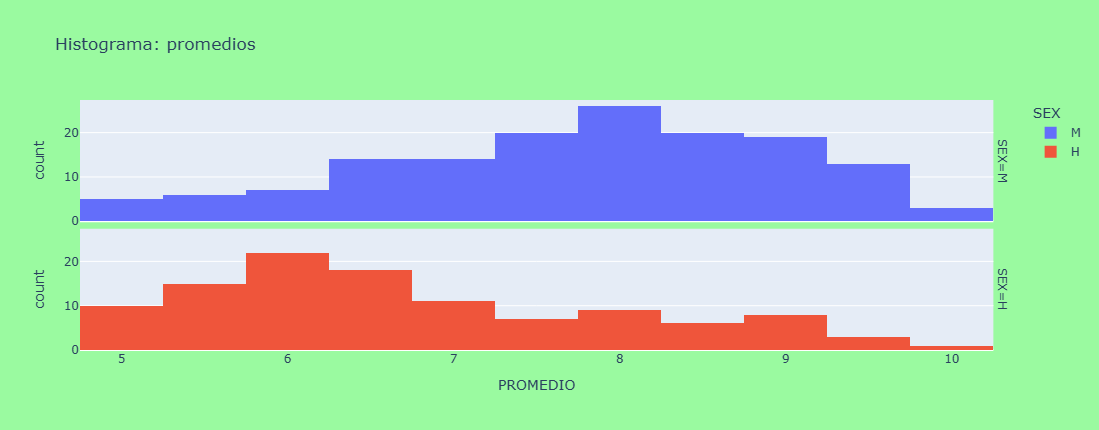

In [222]:
fig3.show()

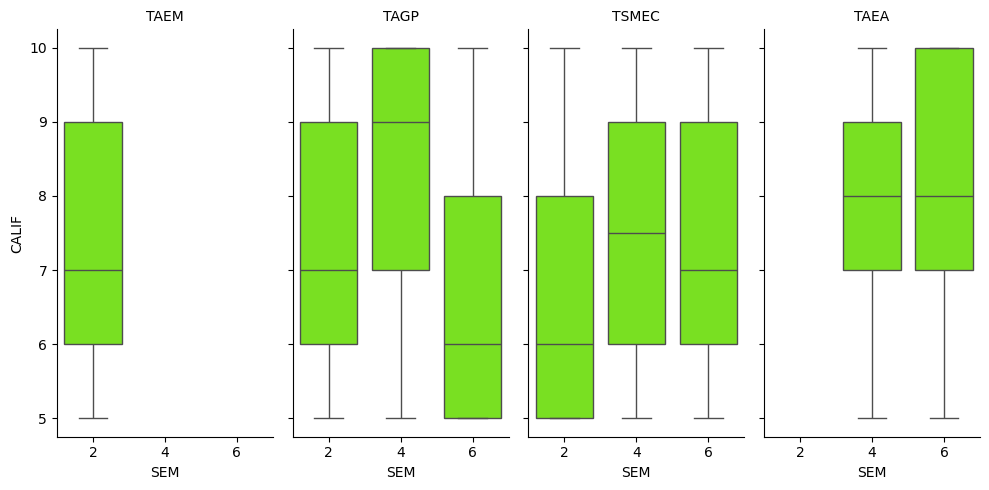

In [173]:
#de la base de datos inicial solo vamos a extraer lo correspondiente a 2-2024 y plotear
# el comportamiento de las calificaciones registradas --Distribución General de Calificaciones-- 
# por carrera y semestre

cbx_2024 = cbx.loc[cbx['PERIODO']== 'SEMESTRAL 2 - 2024'].sort_values('GPO')
g = sns.FacetGrid(cbx_2024, col = 'CARR',height=5,aspect=0.5)
g.map_dataframe(sns.boxplot, x='SEM', y ='CALIF', color='#76FF03')
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g

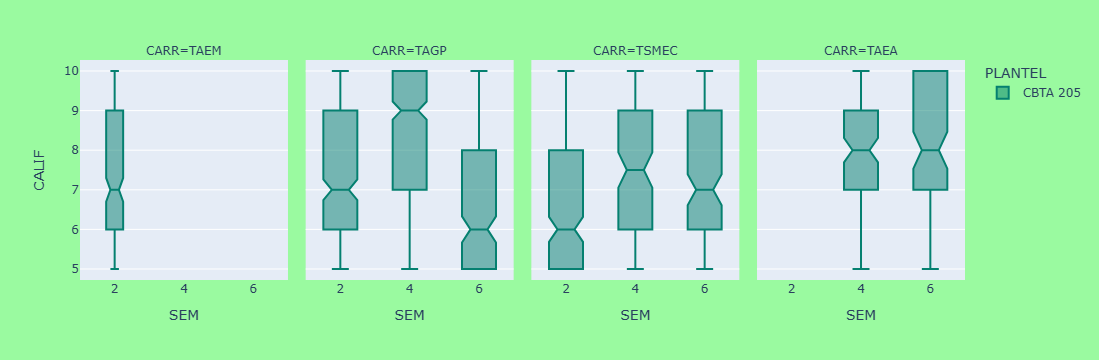

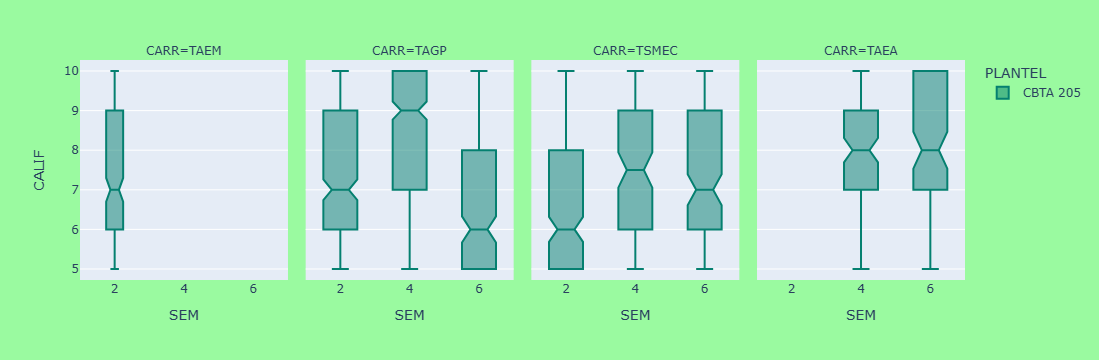

In [174]:

g1 = px.box(cbx_2024, x="SEM", y="CALIF", facet_col='CARR',
          notched=True, color = 'PLANTEL',
          color_discrete_map = {"CBTA 205": "#058070"})
g1.update_layout(paper_bgcolor='#9afaa0') 
g1.show()

<h1 style="color:red;">MATRICULA</h1>

In [121]:
# CANTIDAD DE ALUMNOS CON REGISTRO DE CALIFICACIÓN EN CByP USANDO XLSX PARCIAL 2

matricula = len(cbx['NCONT'].unique())
matricula

256

In [122]:
signed_calif = cbx.groupby(['CARR'])['NCONT'].nunique()
signed_calif=signed_calif.reset_index()
print(signed_calif)
signed_calif2 = signed_calif['NCONT'].agg({'sum'})
print(" ")
print("Total de alumnos con calificación en carreras: ",signed_calif2)

    CARR  NCONT
0   TAEA     30
1   TAEM     31
2   TAGP    126
3  TSMEC     69
 
Total de alumnos con calificación en carreras:  sum    256
Name: NCONT, dtype: int64


In [123]:
mat_por_carrera = signed_calif
mat_por_carrera

CARR  NCONT
0   TAEA     30
1   TAEM     31
2   TAGP    126
3  TSMEC     69

In [136]:
signed_califx = cbx.groupby(['SEM','CARR'])['NCONT'].nunique()
signed_califx=signed_califx.reset_index()
signed_calif3 = signed_califx['NCONT'].agg({'sum'})
signed_califx = signed_califx.rename(columns={'NCONT':'MATRICULA'})
print(signed_califx)

print(" ")
print("Total de alumnos con calificación en carreras: ",signed_calif3)

mat_por_gpo = signed_califx
mat_por_gpo

   SEM   CARR  MATRICULA
0    2   TAEM         31
1    2   TAGP         37
2    2  TSMEC         29
3    4   TAEA         13
4    4   TAGP         56
5    4  TSMEC         16
6    6   TAEA         17
7    6   TAGP         34
8    6  TSMEC         24
 
Total de alumnos con calificación en carreras:  sum    257
Name: NCONT, dtype: int64


SEM   CARR  MATRICULA
0    2   TAEM         31
1    2   TAGP         37
2    2  TSMEC         29
3    4   TAEA         13
4    4   TAGP         56
5    4  TSMEC         16
6    6   TAEA         17
7    6   TAGP         34
8    6  TSMEC         24

<h1 style="color:red;">REPROBADOS</h1>

In [137]:
repro = cbx.loc[(cbx['CALIF']<=5) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
repro = repro.groupby(['CARR','SEM','GPO','PAT','MAT','NOM'])['CURP'].count()
cont_reprobados = len(repro)
cont_reprobados

131

In [138]:
reprobados = cbx.loc[(cbx['CALIF']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]['NCONT'].nunique()

reprobados

131

In [139]:

reprobados =cbx.loc[cbx['CALIF']<6].groupby(['CARR','GPO','NCONT']).agg({'NCONT':'count'})
reprobados=reprobados.rename(columns={'NCONT':'CONT'})
reprobados = reprobados.reset_index()
len(reprobados)

131

In [140]:
reprobados =cbx.loc[cbx['CALIF']<6].groupby(['CARR','GPO','NCONT']).agg({'NCONT':'count'})
reprobados=reprobados.rename(columns={'NCONT':'CONT'})
reprobados = reprobados.reset_index()
len(reprobados)

131

In [141]:
print("El total de alumnos con alguna calificación reprobatoria: ", len(reprobados))

El total de alumnos con alguna calificación reprobatoria:  131


In [142]:
repro_perc = round((len(reprobados)/signed_calif3)*100,2)
repro_perc = repro_perc[0]
repro_perc

C:\Users\reneb\AppData\Local\Temp\ipykernel_25520\2162666714.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



50.97

In [143]:
#PARCIAL 1
print("El % de alumnos con alguna calificación reprobatoria es: ",str(round((len(reprobados)/signed_calif3)*100,2)))

El % de alumnos con alguna calificación reprobatoria es:  sum    50.97
Name: NCONT, dtype: float64


In [144]:
REP_mean2 = arep2b.groupby(['GPO','SEM','CARR','ASIG'])['REP_ASIG'].mean().round(2)
REP_mean2 = pd.DataFrame(REP_mean2)
REP_mean2 = REP_mean2.rename(columns={'REP_ASIG':'%Rep'})
REP_mean2 = REP_mean2.sort_values('%Rep',ascending=False)
REP_mean2 = REP_mean2.reset_index()

In [145]:
rep_asig = REP_mean2.sort_values(['%Rep','CARR'], ascending=False)
rep_asig

GPO  SEM   CARR       ASIG  %Rep
0   6A    6   TAGP    PROyEST  67.6
1   2A    2  TSMEC  CDIGIT_II  60.7
2   4A    4  TSMEC  SOTECDIST  56.2
3   2A    2  TSMEC  Ingles II  55.6
4   2A    2  TSMEC      PM_II  53.6
..  ..  ...    ...        ...   ...
62  4A    4  TSMEC  Ingles IV   6.2
63  6A    6  TSMEC      ORLAN   4.2
64  4A    4   TAGP      MAVES   4.0
65  4A    4   TAGP    MONOGAS   4.0
66  4A    4   TAGP    POLIGAS   4.0

[67 rows x 5 columns]

In [134]:
print('Porcentaje de reprobación observado en las asignaturas impartidas en cada uno de los grupos.')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(REP_mean2)

Porcentaje de reprobación observado en las asignaturas impartidas en cada uno de los grupos.


GPO  SEM   CARR          ASIG  %Rep
0   6A    6   TAGP       PROyEST  67.6
1   2A    2  TSMEC     CDIGIT_II  60.7
2   4A    4  TSMEC     SOTECDIST  56.2
3   2A    2  TSMEC     Ingles II  55.6
4   2A    2  TSMEC         PM_II  53.6
5   6A    6   TAGP       INTECON  50.0
6   6A    6   TAGP       INDRCHO  50.0
7   2A    2  TSMEC        LyC II  48.1
8   6A    6   TAGP        TEMFIL  41.2
9   6A    6   TAGP     OPPROYAGR  41.2
10  6A    6   TAGP         TEMCS  40.0
11  2A    2  TSMEC  CNSENRGINTMT  39.3
12  2A    2   TAGP        LyC II  37.1
13  2A    2   TAGP     CDIGIT_II  36.1
14  2A    2  TSMEC      INSTSOFT  35.7
15  2A    2   TAEM     CDIGIT_II  35.5
16  6A    6   TAEA        TEMFIL  35.3
17  2A    2  TSMEC         CS_II  34.5
18  6A    6   TAGP     TBIOLCONT  33.3
19  6A    6  TSMEC       PROyEST  33.3
20  4A    4  TSMEC   SELECTMAT_I  31.2
21  6A    6   TAEA       PROyEST  29.4
22  6A    6  TSMEC        TEMFIL  29.2
23  2A    2   TAEM         PM_II  29.0
24  2A    2   TAEM     Ingles II  29.0
25  6A    6  TSMEC     TBIOLCONT  28.6
26  2A    2   TAGP  CNSENRGINTMT  27.8
27  2A    2   TAEM    RGCONTUECO  25.8
28  6A    6  TSMEC         TEMCS  23.1
29  4A    4   TAEA       RQCMFNS  23.1
30  4A    4   TAGP       RQCMFNS  22.6
31  2A    2   TAGP       PCTVCLA  19.4
32  4A    4   TAGP   SELECTMAT_I  19.4
33  2A    2   TAGP         CS_II  19.4
34  2A    2   TAGP     Ingles II  19.4
35  2A    2   TAEM        LyC II  19.4
36  4A    4   TAGP        CS_III  19.4
37  2A    2  TSMEC      ENINCDPP  17.9
38  6A    6   TAEA     PMERCALNZ  17.6
39  6A    6   TAGP          TCSD  16.7
40  2A    2   TAEM  CNSENRGINTMT  16.1
41  4A    4   TAGP     PHORTOFRU  16.1
42  4A    4   TAGP      CNHIST_1  16.1
43  6A    6   TAGP    EPRFPRYAGR  14.7
44  6A    6  TSMEC          TCSD  14.3
45  2A    2   TAGP      CLTVPRTG  13.9
46  2A    2   TAGP     PRIMORGAG  13.9
47  4A    4   TAGP      PRLACTEO  12.9
48  4A    4  TSMEC        CS_III  12.5
49  2A    2   TAGP         PM_II  11.1
50  6A    6   TAGP    LITERATURA  10.0
51  6A    6  TSMEC         IRLAN   8.3
52  4A    4   TAGP      Ecología   8.0
53  4A    4   TAGP        CALCDF   8.0
54  4A    4   TAGP     Inglés IV   8.0
55  4A    4   TAGP      Física I   8.0
56  4A    4   TAEA      CNHIST_1   7.7
57  4A    4   TAEA   SELECTMAT_I   7.7
58  2A    2   TAEM    CPODCUNIDE   6.5
59  4A    4   TAGP     Ingles IV   6.5
60  2A    2   TAEM         CS_II   6.5
61  4A    4   TAGP     PPRODCARN   6.5
62  4A    4  TSMEC     Ingles IV   6.2
63  6A    6  TSMEC         ORLAN   4.2
64  4A    4   TAGP         MAVES   4.0
65  4A    4   TAGP       MONOGAS   4.0
66  4A    4   TAGP       POLIGAS   4.0

In [135]:
"""

# ploteo por semestre
REP_mean2['ASIG'] = REP_mean2['ASIG'].apply(str)

graph = sns.FacetGrid(REP_mean2, col ='CARR', hue='SEM',height=9,aspect=0.3)

# map the above form facetgrid with some attributes
graph.map(plt.barh, 'ASIG', '%Rep')

graph.set_titles(row_template = '{row_name}', col_template = '{col_name}')
graph.set_axis_labels("REP (%)", "ASIG")
graph.add_legend()
#plt.subplots(figsize=(26, 22))

#plt.ylim(0,80)
plt.show()

"""

'\n\n# ploteo por semestre\nREP_mean2[\'ASIG\'] = REP_mean2[\'ASIG\'].apply(str)\n\ngraph = sns.FacetGrid(REP_mean2, col =\'CARR\', hue=\'SEM\',height=9,aspect=0.3)\n\n# map the above form facetgrid with some attributes\ngraph.map(plt.barh, \'ASIG\', \'%Rep\')\n\ngraph.set_titles(row_template = \'{row_name}\', col_template = \'{col_name}\')\ngraph.set_axis_labels("REP (%)", "ASIG")\ngraph.add_legend()\n#plt.subplots(figsize=(26, 22))\n\n#plt.ylim(0,80)\nplt.show()\n\n'

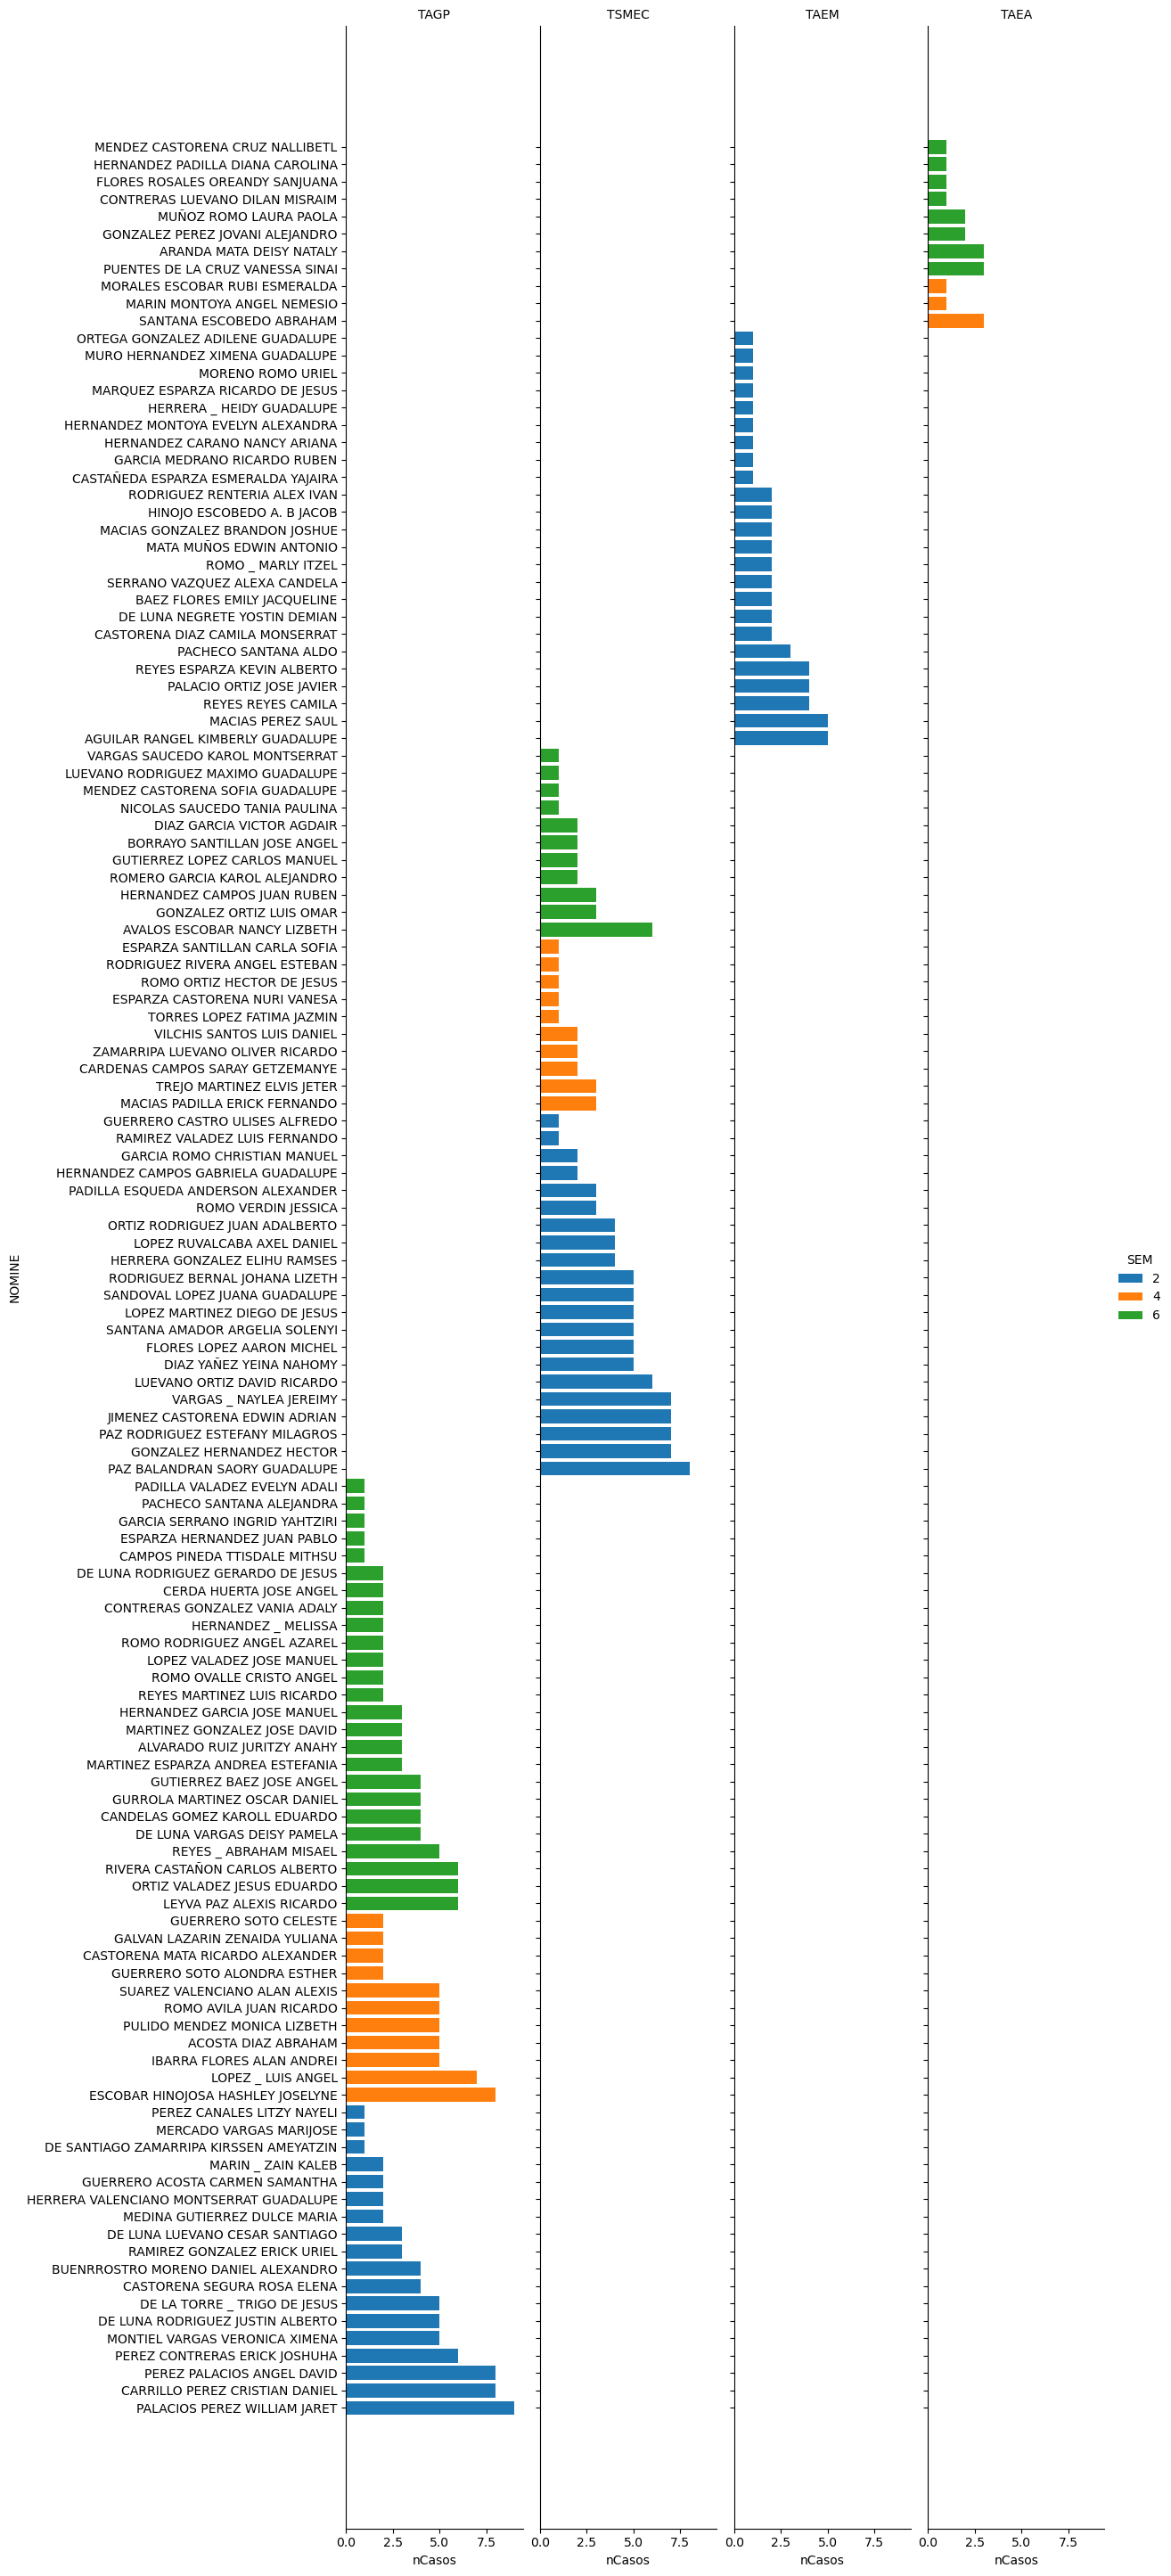

In [136]:


# ploteo por alumno
arep1 = cbx.loc[(cbx['CALIF']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1 = arep1.groupby(['CARR','GPO','SEM','PAT','MAT','NOM'])['NCONT'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'NCONT':'nCasos'})
arep1=arep1.sort_values(['nCasos'],ascending=False)

apair = list()
for i,j,k in zip(arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = i + ' ' + str(j) + ' ' + k
    apair.append(salida)
arep1['NOMINE']=apair


arep1['NOMINE'] = arep1['NOMINE'].apply(str)

graph1 = sns.FacetGrid(arep1, col ='CARR', hue='SEM',height=29,aspect=0.11)

# map the above form facetgrid with some attributes
graph1.map(plt.barh, 'NOMINE', 'nCasos')

graph1.set_titles(row_template = '{row_name}', col_template = '{col_name}')
graph1.set_axis_labels("nCasos", "NOMINE")
graph1.add_legend()
#plt.subplots(figsize=(26, 22))

#plt.ylim(0,80)
plt.show()


In [137]:
arep1 = cbx.loc[(cbx['CALIF']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1 = arep1.groupby(['CARR','GPO','SEM','PAT','MAT','NOM'])['NCONT'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'NCONT':'nCasos'})
arep1=arep1.sort_values(['nCasos'],ascending=False)

apair = list()
for i,j,k in zip(arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = i + ' ' + str(j) + ' ' + k
    apair.append(salida)
arep1['NOMINE']=apair

print('De lo anterior, obtenemos que el porcentaje de alumnos con al menos una materia reprobada:')
print(round(len(arep1['NOMINE'].unique())/len(cbx['NCONT'].unique())*100,2), ' %')

De lo anterior, obtenemos que el porcentaje de alumnos con al menos una materia reprobada:
51.17  %


In [138]:
al =  cbx.loc[(cbx['CALIF']<11) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
al = al.groupby(['CARR','SEM'])['NCONT'].nunique()
al = al.reset_index()
al = al.rename(columns={al.columns[2]:'nAlumnos'})


inn = cbx.loc[(cbx['CALIF']>8) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
inn = inn.groupby(['CARR','SEM'])['NCONT'].nunique()
inn = inn.reset_index()
inn = inn.rename(columns={inn.columns[2]:'nUpg'})


inn_al = al
inn_al['nUpg'] = pd.Series(inn['nUpg'])
inn_al['Upg%'] = round((inn_al.nUpg/inn_al.nAlumnos)*100,1)
inn_al

CARR  SEM  nAlumnos  nUpg   Upg%
0   TAEA    4        13    13  100.0
1   TAEA    6        17    17  100.0
2   TAEM    2        31    24   77.4
3   TAGP    2        36    26   72.2
4   TAGP    4        56    47   83.9
5   TAGP    6        34    26   76.5
6  TSMEC    2        29    10   34.5
7  TSMEC    4        16    11   68.8
8  TSMEC    6        24    17   70.8

In [139]:
"""

check = cbx.loc[(cbx['CALIF']>8) & (cbx['CARR'] == 'TAEM') & (cbx['SEM'] == 2)]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(check)
"""

"\n\ncheck = cbx.loc[(cbx['CALIF']>8) & (cbx['CARR'] == 'TAEM') & (cbx['SEM'] == 2)]\n\nwith pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also\n    display(check)\n"

In [140]:
apair = list()
for i,j,k in zip(arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = i + ' ' + str(j) + ' ' + k
    apair.append(salida)
arep1['NOMINE']=apair

In [141]:
arep1 = cbx.loc[(cbx['CALIF']>8) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]

apair = list()
for i,j,k,l in zip(arep1['NCONT'],arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
arep1['NOMINE']=apair

arep1 = arep1.groupby(['CARR','GPO','SEM','NOMINE'])['NCONT'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'NCONT':'nCasos'})
arep1 =  arep1.sort_values(['nCasos'],ascending=False)
arep1 = arep1.reset_index()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(arep1)

C:\Users\reneb\AppData\Local\Temp\ipykernel_16148\2692398705.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



index   CARR GPO  SEM                                             NOMINE  \
0       78   TAGP  2A    2       24101012050107-GARCIA ROMO BRITTANY DE JESUS   
1      161  TSMEC  2A    2   24101012050101-CARRANZA ESQUIVEL KEMBERLIN MAYLI   
2      162  TSMEC  2A    2             24101012050114-VERDUZCO VAZQUEZ ANDRES   
3      156  TSMEC  2A    2              24101012050036-RODRIGUEZ _ IRWIN JAEL   
4       96   TAGP  4A    4               23101012050040-VALADEZ ROMO GABRIELA   
5       74   TAGP  2A    2            24101012050098-PEREZ _ NAHOMY GUADALUPE   
6       88   TAGP  4A    4       23101012050021-PEREZ MACIAS SELENE GUADALUPE   
7       56   TAGP  2A    2  24101012050020-RODRIGUEZ HERRERA DENNIS JAQUELINE   
8      106   TAGP  4A    4      23101012050085-MACIAS GONZALEZ PAULINA YAKSEL   
9       93   TAGP  4A    4        23101012050029-FLORES ARAIZA ANIBAL GABRIEL   
10      60   TAGP  2A    2    24101012050049-GONZALEZ ESPARZA TANIA GUADALUPE   
11     110   TAGP  4A    4     23101012050096-FLORES RODRIGUEZ JOSE GUADALUPE   
12     159  TSMEC  2A    2          24101012050067-CONTRERAS CERROS SOL ITZEL   
13     113   TAGP  4A    4       23101012050102-MONTOYA DE LUNA BLANCA JANETH   
14      57   TAGP  2A    2    24101012050028-LUEVANO SERRANO KATHERINE MICHEL   
15     105   TAGP  4A    4     23101012050084-PALACIOS RUIZ GABRIELA MICHELLE   
16     125   TAGP  4A    4        23101012050126-MACIAS OROZCO MIGUEL ANTONIO   
17     116   TAGP  4A    4               23101012050107-MERCADO PEREA SAMANTA   
18     117   TAGP  4A    4           23101012050109-SAUCEDO LOPEZ KARLA MARIA   
19     118   TAGP  4A    4      23101012050110-VALENCIA PASILLAS LUIS ANTONIO   
20     119   TAGP  4A    4        23101012050111-YAÑEZ ROSAS MARIA DEL CARMEN   
21     120   TAGP  4A    4           23101012050112-MEZA ALVAREZ IRIS DANIELA   
22       7   TAEA  4A    4    23101012050046-CARRANZA ESQUIVEL CARMEN GORETTI   
23     121   TAGP  4A    4         23101012050114-LOMELI FLORES ANDREA SELENI   
24     158  TSMEC  2A    2    24101012050054-MARTINEZ MARIN ELENA DEL ROSARIO   
25     109   TAGP  4A    4                  23101012050094-DIAZ ROMAN RICARDO   
26      43   TAEM  2A    2     24101012050066-MARES CARRANZA ISABEL GUADALUPE   
27     104   TAGP  4A    4              23101012050083-ZAMARRIPA GARCIA EDITH   
28     107   TAGP  4A    4        23101012050091-CASTORENA VILLALOBOS CITLALI   
29      58   TAGP  2A    2     24101012050030-GUERRERO SUAREZ MELANY FERNANDA   
30     103   TAGP  4A    4         23101012050078-PALACIOS CARDONA ANA LUPITA   
31     124   TAGP  4A    4        23101012050125-DURON URRUTIA JOSE GUADALUPE   
32     160  TSMEC  2A    2    24101012050074-VITAL ESCOBAR FATIMA DEL ROSARIO   
33     101   TAGP  4A    4  23101012050067-TORRES GUERRERO YARISBEL DEL ROCIO   
34     115   TAGP  4A    4  23101012050106-RODRIGUEZ NEGRETE SANJUANA DEL ...   
35     123   TAGP  4A    4      23101012050124-CHAVEZ MARTINEZ TANIA VERONICA   
36     131   TAGP  6A    6       22101012050010-MUÑOZ HERNANDEZ JOSHUA ISAIAH   
37      82   TAGP  4A    4  191011205A0024-RODRIGUEZ LANDEROS MARÍA GUADALUPE   
38      80   TAGP  4A    4  13101012050613-RODRIGUEZ LANDEROS JANETH CRISTINA   
39      92   TAGP  4A    4    23101012050027-ESCOBEDO GUERRERO BRENDA YESENIA   
40      31   TAEM  2A    2       24101012050005-CHAVEZ MORENO RAMSES EMILIANO   
41      18   TAEA  6A    6        22101012050019-ORTIZ SANTILLAN DAYANA LIZET   
42     126   TAGP  4A    4      23101012050128-SANCHEZ BAEZ MARIANA GUADALUPE   
43      75   TAGP  2A    2        24101012050099-RODRIGUEZ ROMO DYLAN ALBERTO   
44      28   TAEA  6A    6           22101012050087-ORTIZ REYES MA. GUADALUPE   
45     100   TAGP  4A    4        23101012050062-LOPEZ FLORES MARIA GUADALUPE   
46      64   TAGP  2A    2     24101012050058-GARCIA REYES BRITANY MONSERRATH   
47      68   TAGP  2A    2   24101012050077-JUAREZ CASTORENA FRANCISCO JAVIER   
48      81   TAGP  4A    4          

In [142]:
print('De lo anterior, obtenemos que el porcentaje de alumnos con al menos una materia con 9 o 10:')
print(round(len(arep1['NOMINE'].unique())/len(cbx['NCONT'].unique())*100,2), ' %')

De lo anterior, obtenemos que el porcentaje de alumnos con al menos una materia con 9 o 10:
74.61  %


<h1 style="color:red;">PROMEDIO INDIVIDUAL</h1>

In [172]:
promedio_individual.columns
promedio_individual = promedio_individual.rename(columns={'NOMINE':'NOMBRE', 'media':'PROMEDIO'})
promedio_individual['PROMEDIO'] = pd.to_numeric(promedio_individual['PROMEDIO'])
promedio_individual['PROMEDIO'] = promedio_individual['PROMEDIO'].round(1)
promedio_individual

Index(['CARR', 'GPO', 'NOMBRE', 'PROMEDIO'], dtype='object')

CARR GPO                                         NOMBRE  PROMEDIO
0     TAGP  4A    23101012050126-MACIAS OROZCO MIGUEL ANTONIO      10.0
1     TAGP  4A   23101012050102-MONTOYA DE LUNA BLANCA JANETH      10.0
2     TAGP  4A    23101012050111-YAÑEZ ROSAS MARIA DEL CARMEN      10.0
3    TSMEC  2A          24101012050036-RODRIGUEZ _ IRWIN JAEL       9.9
4     TAGP  4A           23101012050040-VALADEZ ROMO GABRIELA       9.9
..     ...  ..                                            ...       ...
251  TSMEC  2A   24101012050115-PAZ BALANDRAN SAORY GUADALUPE       5.0
252  TSMEC  2A   23101012050079-RAMIREZ VALADEZ LUIS FERNANDO       5.0
253   TAGP  2A    24101012050009-PALACIOS PEREZ WILLIAM JARET       5.0
254   TAGP  2A  23101012050043-CARRILLO PEREZ CRISTIAN DANIEL       5.0
255   TAGP  6A        21101012050062-LEYVA PAZ ALEXIS RICARDO       5.0

[256 rows x 4 columns]

In [152]:

arep1 = cbx.loc[(cbx['CALIF']<11) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]

apair = list()
for i,j,k,l in zip(arep1['NCONT'],arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
arep1['NOMINE']=apair

#agg("mean", axis="columns")


arep1 = arep1.groupby(['CARR','GPO','SEM','NOMINE'])['PAR1'].agg('mean')

arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'PAR1':'media'})
#arep1.media = arep1.media.round(2)
#arep1['media'] = arep1['media'].round(2)
arep1 = arep1.sort_values(['media'],ascending=False)
arep1 = arep1.reset_index()
arep1 = arep1.iloc[:,[1,2,4,5]]

promedio_individual = arep1


print('El promedio general del parcial I para cada alumno del plantel es:')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(promedio_individual)


El promedio general del parcial I para cada alumno del plantel es:


C:\Users\reneb\AppData\Local\Temp\ipykernel_25520\4292721674.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CARR GPO                                             NOMINE     media
0     TAGP  4A        23101012050126-MACIAS OROZCO MIGUEL ANTONIO      10.0
1     TAGP  4A       23101012050102-MONTOYA DE LUNA BLANCA JANETH      10.0
2     TAGP  4A        23101012050111-YAÑEZ ROSAS MARIA DEL CARMEN      10.0
3    TSMEC  2A              24101012050036-RODRIGUEZ _ IRWIN JAEL     9.875
4     TAGP  4A               23101012050040-VALADEZ ROMO GABRIELA     9.875
5     TAGP  4A       23101012050021-PEREZ MACIAS SELENE GUADALUPE     9.875
6     TAGP  4A         23101012050114-LOMELI FLORES ANDREA SELENI  9.857143
7    TSMEC  2A    24101012050054-MARTINEZ MARIN ELENA DEL ROSARIO      9.75
8     TAEA  6A        22101012050019-ORTIZ SANTILLAN DAYANA LIZET  9.666667
9     TAGP  6A       22101012050010-MUÑOZ HERNANDEZ JOSHUA ISAIAH  9.666667
10    TAGP  6A             22101012050114-SANCHEZ BAEZ MARIA JOSE  9.666667
11    TAEA  6A           22101012050087-ORTIZ REYES MA. GUADALUPE  9.666667
12    TAGP  2A       24101012050107-GARCIA ROMO BRITTANY DE JESUS  9.666667
13   TSMEC  2A   24101012050101-CARRANZA ESQUIVEL KEMBERLIN MAYLI     9.625
14   TSMEC  2A             24101012050114-VERDUZCO VAZQUEZ ANDRES     9.625
15   TSMEC  2A          24101012050067-CONTRERAS CERROS SOL ITZEL     9.625
16    TAGP  4A      23101012050085-MACIAS GONZALEZ PAULINA YAKSEL     9.625
17    TAGP  4A      23101012050110-VALENCIA PASILLAS LUIS ANTONIO  9.571429
18    TAGP  4A           23101012050112-MEZA ALVAREZ IRIS DANIELA  9.571429
19    TAGP  4A           23101012050109-SAUCEDO LOPEZ KARLA MARIA  9.571429
20    TAGP  4A               23101012050107-MERCADO PEREA SAMANTA  9.571429
21   TSMEC  6A            22101012050033-DIAZ GARCIA BRIANA CORAL       9.5
22    TAGP  4A     23101012050084-PALACIOS RUIZ GABRIELA MICHELLE       9.5
23    TAGP  4A  191011205A0024-RODRIGUEZ LANDEROS MARÍA GUADALUPE  9.428571
24    TAGP  4A  13101012050613-RODRIGUEZ LANDEROS JANETH CRISTINA  9.428571
25    TAGP  2A  24101012050020-RODRIGUEZ HERRERA DENNIS JAQUELINE  9.333333
26    TAGP  4A      23101012050124-CHAVEZ MARTINEZ TANIA VERONICA  9.285714
27   TSMEC  4A           23101012050044-OLAYO _ JAKSIRI GUADALUPE  9.285714
28    TAGP  4A        23101012050091-CASTORENA VILLALOBOS CITLALI  9.285714
29    TAEA  4A    23101012050046-CARRANZA ESQUIVEL CARMEN GORETTI      9.25
30    TAEM  2A       24101012050005-CHAVEZ MORENO RAMSES EMILIANO      9.25
31    TAGP  2A            24101012050098-PEREZ _ NAHOMY GUADALUPE  9.222222
32    TAEA  6A                22101012050014-GOMEZ _ MITZY JUDITH  9.166667
33   TSMEC  4A   23101012050066-TORRES DE LA CRUZ JASSILEY JAZMIN  9.142857
34    TAEM  2A        24101012050004-CALZADA LEYVA ALAN GUILLERMO     9.125
35   TSMEC  2A    24101012050074-VITAL ESCOBAR FATIMA DEL ROSARIO     9.125
36    TAGP  4A        23101012050029-FLORES ARAIZA ANIBAL GABRIEL     9.125
37    TAGP  4A              23101012050083-ZAMARRIPA GARCIA EDITH     9.125
38    TAGP  4A    23101012050027-ESCOBEDO GUERRERO BRENDA YESENIA     9.125
39    TAGP  2A     24101012050030-GUERRERO SUAREZ MELANY FERNANDA  9.111111
40    TAGP  4A  23101012050106-RODRIGUEZ NEGRETE SANJUANA DEL ...       9.0
41    TAGP  4A                  23101012050094-DIAZ ROMAN RICARDO       9.0
42    TAGP  4A        23101012050125-DURON URRUTIA JOSE GUADALUPE       9.0
43    TAGP  4A      23101012050128-SANCHEZ BAEZ MARIANA GUADALUPE       9.0
44    TAGP  6A          22101012050007-CALVILLO MACIAS JUAN JESUS       9.0
45    TAGP  4A     23101012050096-FLORES RODRIGUEZ JOSE GUADALUPE       9.0
46    TAEA  6A        22101012050067-MUÑOZ MUÑOZ CAMILA GUADALUPE       9.0
47    TAGP  4A        23101012050062-LOPEZ FLORES MARIA GUADALUPE       9.0
48   TSMEC  4A  23101012050061-HERNANDEZ ESCOBEDO FERNANDA SAN...       9.0
49    TAGP  2A    24101012050049-GONZALEZ ESPARZA TANIA GUADALUPE       9.0
50   TSMEC  6A                 21101012050094-GUTIERREZ ROMO RITA       9.0
51    TAGP  4A              23101012050023-VASQUEZ GAY

In [153]:
reprobados['idx']=[f"{a} {b}" for a,b in zip(reprobados.CARR,reprobados.GPO)]

<h1 style="color:red;">MATRIZ</h1>h1>

In [154]:
# how many asigments filed per student
print('Se muestra a continuación la cantidad de alumnos (por grupo) y que tienen 1,2,..., y hasta 9 asignaturas reprobadas')
outn = pd.DataFrame()
listado = []
for i in reprobados['CONT'].unique():
    outx = reprobados.loc[(reprobados['CONT']==i)].groupby('idx').nunique()
    listado.append(i)

    outn = pd.concat([outn,outx['NCONT']],axis=1)


outn.columns=listado
outn = outn.fillna(0)
outn = outn.reindex(sorted(outn.columns),axis=1)
outn = pd.DataFrame(outn)

for col in  outn.columns[0:]:
    outn[col] = pd.to_numeric(outn[col], downcast='integer', errors='coerce')

matriz = outn

Se muestra a continuación la cantidad de alumnos (por grupo) y que tienen 1,2,..., y hasta 9 asignaturas reprobadas


In [155]:
matriz = matriz.reset_index()
matriz = matriz.rename(columns={'index':'GPO/#ASIGS'})
matriz.columns = ['GPO','1\nAsig','2\nAsig','3\nAsig','4\nAsig','5\nAsig','6\nAsig','7\nAsig','8\nAsig','9\nAsig']
matriz

GPO  1\nAsig  2\nAsig  3\nAsig  4\nAsig  5\nAsig  6\nAsig  7\nAsig  \
0   TAEA 4A        2        0        1        0        0        0        0   
1   TAEA 6A        4        2        2        0        0        0        0   
2   TAEM 2A        9        9        1        3        2        0        0   
3   TAGP 2A        3        4        2        2        3        1        0   
4   TAGP 6A        5        8        4        4        1        3        0   
5  TSMEC 2A        2        2        2        3        6        1        4   
6  TSMEC 4A        5        3        2        0        0        0        0   
7  TSMEC 6A        4        4        2        0        0        1        0   
8   TAGP 4A        0        4        0        0        5        0        1   

   8\nAsig  9\nAsig  
0        0        0  
1        0        0  
2        0        0  
3        2        1  
4        0        0  
5        1        0  
6        0        0  
7        0        0  
8        1        0

In [156]:
destacados =cbx.loc[cbx['CALIF']>8]

apair = list()
for i,j,k,l in zip(destacados['NCONT'],destacados['PAT'],destacados['MAT'], destacados['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
destacados['NOMINE']=apair

destacados =destacados.groupby(['CARR','GPO','NOMINE']).agg({'NCONT':'count'})
destacados=destacados.rename(columns={'NCONT':'CONT'})

destacados = destacados.reset_index()
destacados['idx']=[f"{a} {b}" for a,b in zip(destacados.NOMINE,destacados.GPO)]

C:\Users\reneb\AppData\Local\Temp\ipykernel_25520\4235685020.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
asigna =cbx.loc[cbx['CALIF']<18]

apair = list()
for i,j,k,l in zip(asigna['NCONT'],asigna['PAT'],asigna['MAT'], asigna['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
asigna['NOMINE']=apair

asigna =asigna.groupby(['CARR','GPO','NCONT','NOMINE']).agg({'ASIG':'count'})
asigna=asigna.rename(columns={'ASIG':'ASIGS'})

asigna = asigna.reset_index()
asigna['idy']=[f"{a} {b}" for a,b in zip(asigna.NOMINE,asigna.GPO)]
#destacados['perc']=round((destacados.CONT/destacados.ASIGS)*100,1)

C:\Users\reneb\AppData\Local\Temp\ipykernel_25520\550432099.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:
coinci = pd.merge(destacados, asigna, left_on='idx', right_on='idy', how='left').drop('idy', axis=1)

coinci['%'] = round((coinci.CONT/coinci.ASIGS)*100,1)
coinci['Ratio'] = coinci['CONT'].map(str) + '/' + coinci['ASIGS'].map(str)
coinci = coinci.rename(columns={'NOMINE_y':'NOMINE'})
coinci =coinci.loc[coinci['%']>75].sort_values(['%'],ascending=False)
coinci = coinci.reset_index()
coinci = coinci.loc[:,['idx','%','Ratio']]
coinci = coinci.rename(columns={'idx':'NOM'})
tab_destacados = coinci

print('Hay 37 alumnos destacados que tuvieron calificaciones de 9 o de 10 en más del 75% de las asignaturas que están cursando. Por ejemplo: MONTOYA DE LUNA BLANCA JANETH obtuvo calificaciones de 9 o 10 en el 100% de sus asignaturas, es decir, en 7 de 7. Para fines de este documento, llamaremos a estos alumnos "Alumnos destacados".')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(tab_destacados)



Hay 37 alumnos destacados que tuvieron calificaciones de 9 o de 10 en más del 75% de las asignaturas que están cursando. Por ejemplo: MONTOYA DE LUNA BLANCA JANETH obtuvo calificaciones de 9 o 10 en el 100% de sus asignaturas, es decir, en 7 de 7. Para fines de este documento, llamaremos a estos alumnos "Alumnos destacados".


NOM      % Ratio
0     23101012050102-MONTOYA DE LUNA BLANCA JANETH 4A  100.0   7/7
1             23101012050040-VALADEZ ROMO GABRIELA 4A  100.0   8/8
2         23101012050109-SAUCEDO LOPEZ KARLA MARIA 4A  100.0   7/7
3             23101012050107-MERCADO PEREA SAMANTA 4A  100.0   7/7
4         23101012050112-MEZA ALVAREZ IRIS DANIELA 4A  100.0   7/7
5      22101012050019-ORTIZ SANTILLAN DAYANA LIZET 6A  100.0   6/6
6   23101012050096-FLORES RODRIGUEZ JOSE GUADALUPE 4A  100.0   7/7
7       23101012050114-LOMELI FLORES ANDREA SELENI 4A  100.0   7/7
8      23101012050126-MACIAS OROZCO MIGUEL ANTONIO 4A  100.0   7/7
9    23101012050085-MACIAS GONZALEZ PAULINA YAKSEL 4A  100.0   8/8
10    22101012050010-MUÑOZ HERNANDEZ JOSHUA ISAIAH 6A  100.0   6/6
11           24101012050036-RODRIGUEZ _ IRWIN JAEL 2A  100.0   8/8
12     23101012050111-YAÑEZ ROSAS MARIA DEL CARMEN 4A  100.0   7/7
13    23101012050021-PEREZ MACIAS SELENE GUADALUPE 4A  100.0   8/8
14    24101012050107-GARCIA ROMO BRITTANY DE JESUS 2A  100.0   9/9
15  24101012050101-CARRANZA ESQUIVEL KEMBERLIN MAY...  100.0   8/8
16          24101012050114-VERDUZCO VAZQUEZ ANDRES 2A  100.0   8/8
17        22101012050087-ORTIZ REYES MA. GUADALUPE 6A  100.0   6/6
18   23101012050110-VALENCIA PASILLAS LUIS ANTONIO 4A  100.0   7/7
19         24101012050098-PEREZ _ NAHOMY GUADALUPE 2A   88.9   8/9
20  24101012050020-RODRIGUEZ HERRERA DENNIS JAQUEL...   88.9   8/9
21  24101012050054-MARTINEZ MARIN ELENA DEL ROSARI...   87.5   7/8
22       24101012050067-CONTRERAS CERROS SOL ITZEL 2A   87.5   7/8
23  23101012050046-CARRANZA ESQUIVEL CARMEN GORETT...   87.5   7/8
24  23101012050084-PALACIOS RUIZ GABRIELA MICHELLE 4A   87.5   7/8
25     23101012050029-FLORES ARAIZA ANIBAL GABRIEL 4A   87.5   7/8
26  23101012050106-RODRIGUEZ NEGRETE SANJUANA DEL ...   85.7   6/7
27               23101012050094-DIAZ ROMAN RICARDO 4A   85.7   6/7
28   23101012050124-CHAVEZ MARTINEZ TANIA VERONICA 4A   85.7   6/7
29     23101012050125-DURON URRUTIA JOSE GUADALUPE 4A   85.7   6/7
30     23101012050091-CASTORENA VILLALOBOS CITLALI 4A   85.7   6/7
31  191011205A0024-RODRIGUEZ LANDEROS MARÍA GUADAL...   85.7   6/7
32  13101012050613-RODRIGUEZ LANDEROS JANETH CRIST...   85.7   6/7
33          22101012050114-SANCHEZ BAEZ MARIA JOSE 6A   83.3   5/6
34         22101012050033-DIAZ GARCIA BRIANA CORAL 6A   83.3   5/6
35  24101012050049-GONZALEZ ESPARZA TANIA GUADALUP...   77.8   7/9
36  24101012050028-LUEVANO SERRANO KATHERINE MICHE...   77.8   7/9

In [161]:
tot_destacados = round(len(coinci['NOM'].unique()))
tot_destacados

37

In [164]:
print('De lo anterior, obtenemos que el porcentaje de Alumnos destacados es:')
print(round(len(coinci['NOM'].unique())/len(cbx['NCONT'].unique())*100,2), ' %')
destacados_perc = round(len(coinci['NOM'].unique())/len(cbx['NCONT'].unique())*100,2)
destacados_perc

De lo anterior, obtenemos que el porcentaje de Alumnos destacados es:
14.45  %


14.45

In [167]:
print('Se muestra a continuación la cantidad de alumnos (por grupo) y que tienen 1,2,..., o hasta 9 asignaturas con calificación con 9 o 10')

destacados['idx']=[f"{a} {b}" for a,b in zip(destacados.CARR,destacados.GPO)]

outn = pd.DataFrame()
listado = []
for i in destacados['CONT'].unique():
    #outx = reprobados.loc[(reprobados['CONT']==i)].groupby('idx').nunique()
    outx = destacados.loc[(destacados['CONT']==i)].groupby('idx').nunique()
    listado.append(i)

    outn = pd.concat([outn,outx['NOMINE']],axis=1)


outn.columns=listado
outn = outn.fillna(0)
outn = outn.reindex(sorted(outn.columns),axis=1)
outn = pd.DataFrame(outn)
for col in  outn.columns[0:]:
    outn[col] = pd.to_numeric(outn[col], downcast='integer', errors='coerce')
outn = outn.sort_index()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(outn)

Se muestra a continuación la cantidad de alumnos (por grupo) y que tienen 1,2,..., o hasta 9 asignaturas con calificación con 9 o 10


1  2  3  4  5   6   7  8  9
TAEA 4A    4  2  3  3  0   0   1  0  0
TAEA 6A    3  4  5  3  0   2   0  0  0
TAEM 2A    7  5  4  4  2   2   0  0  0
TAGP 2A    4  6  2  4  2   3   2  2  1
TAGP 4A    2  5  5  3  5  13  11  3  0
TAGP 6A   13  9  1  1  1   1   0  0  0
TSMEC 2A   2  1  0  1  0   1   2  3  0
TSMEC 4A   4  1  2  2  2   0   0  0  0
TSMEC 6A   5  3  4  4  1   0   0  0  0

In [168]:

"""
import plotly.express as px

fig = px.imshow(outn, color_continuous_scale='Viridis', aspect="auto")
fig.update_traces(text=outn, texttemplate="%{text}")
fig.update_xaxes(side="top")
fig.show()
"""

'\nimport plotly.express as px\n\nfig = px.imshow(outn, color_continuous_scale=\'Viridis\', aspect="auto")\nfig.update_traces(text=outn, texttemplate="%{text}")\nfig.update_xaxes(side="top")\nfig.show()\n'

Número de materias con calificación de 9 o 10 observadas por alumno.


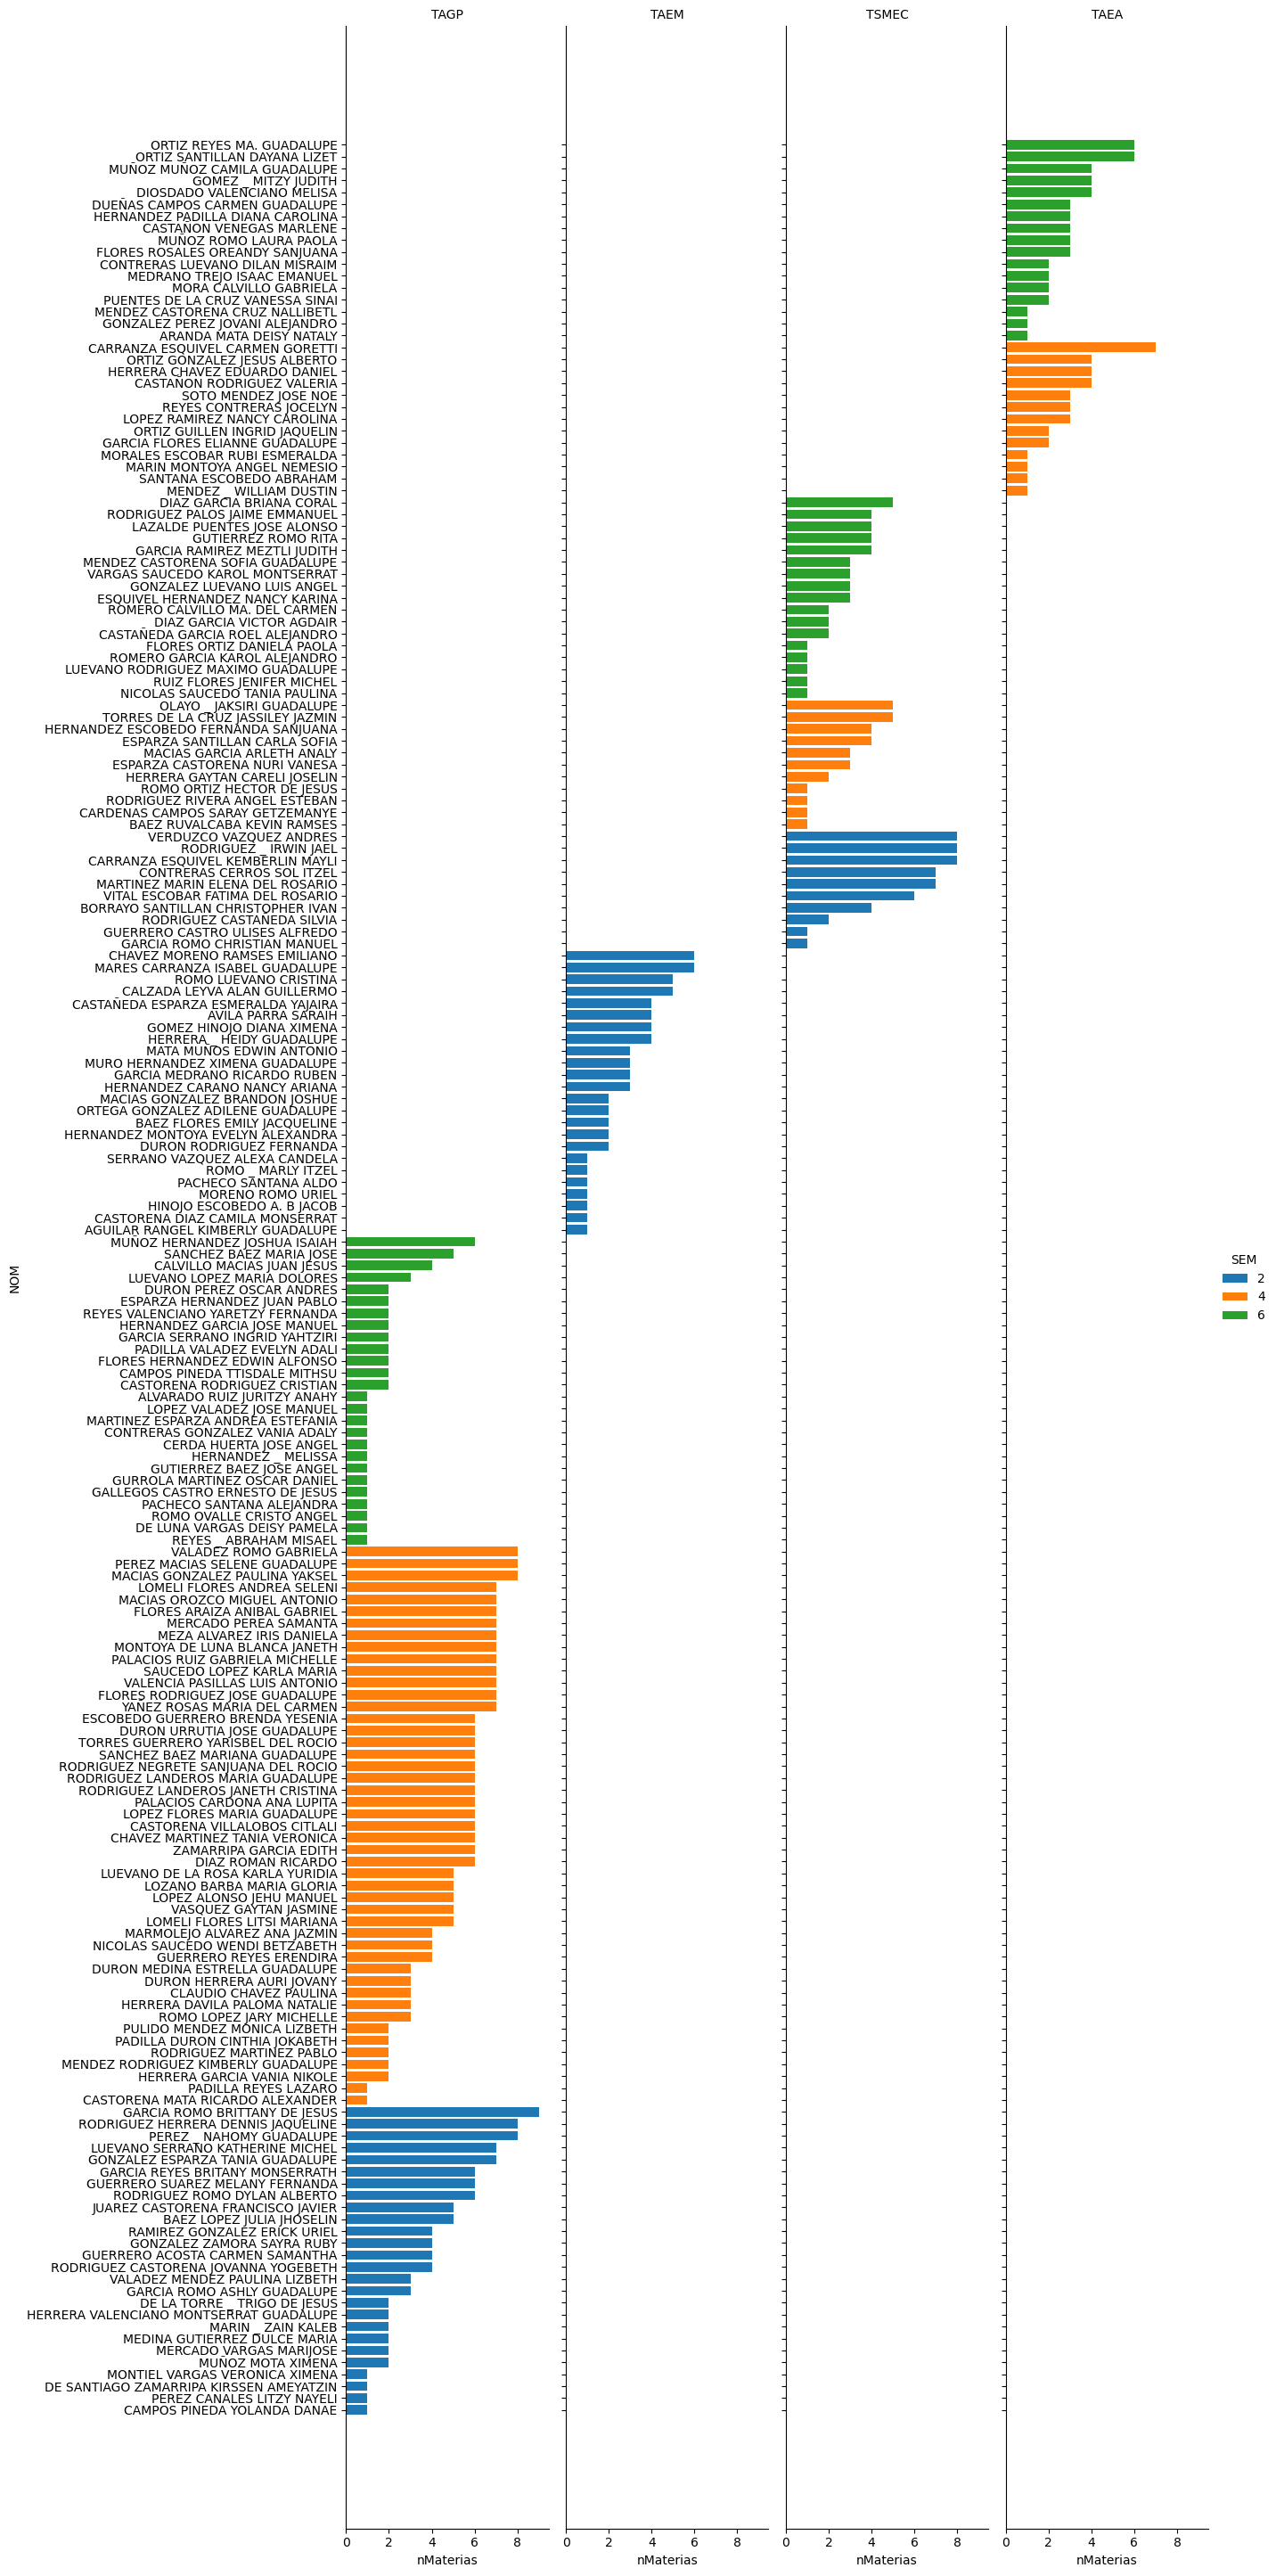

In [169]:


print('Número de materias con calificación de 9 o 10 observadas por alumno.')

# ploteo por alumno
arep1 = cbx.loc[(cbx['CALIF']>8) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1 = arep1.groupby(['CARR','GPO','SEM','PAT','MAT','NOM'])['NCONT'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'NCONT':'nCasos'})
arep1=arep1.sort_values(['nCasos'],ascending=True)

apair = list()
for i,j,k in zip(arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = i + ' ' + str(j) + ' ' + k
    apair.append(salida)
arep1['NOMINE']=apair


arep1['NOMINE'] = arep1['NOMINE'].apply(str)

graph2 = sns.FacetGrid(arep1, col ='CARR', hue='SEM',height=29,aspect=0.12)

# map the above form facetgrid with some attributes
graph2.map(plt.barh, 'NOMINE', 'nCasos')

graph2.set_titles(row_template = '{row_name}', col_template = '{col_name}')
graph2.set_axis_labels("nMaterias", "NOM")
graph2.add_legend()
#plt.subplots(figsize=(26, 22))

#plt.ylim(0,80)
plt.show()



In [170]:
import os

file_path = 'index.html'

In [234]:
# 3. Read the existing HTML template from 'index.html'
with open('index1.html', 'r') as file:
    html_content = file.read()

# 4. Replace placeholders with values from the first row
html_content = html_content.replace("{{matricula}}", str(matricula))
html_content = html_content.replace("{{carreras}}", str(tot_carreras))
html_content = html_content.replace("{{tot_asig}}", str(tot_asig))
html_content = html_content.replace("{{docentes}}", str(docentes))
html_content = html_content.replace("{{mean}}", str(mean))
html_content = html_content.replace("{{sigma}}", str(sd))

html_content = html_content.replace("{{reprobados}}", str(cont_reprobados))
html_content = html_content.replace("{{reprobacion}}", str(repro_perc))

html_content = html_content.replace("{{en_riesgo}}", str(en_riesgo))
html_content = html_content.replace("{{riesgo_perc}}", str(riesgo_perc))
html_content = html_content.replace("{{todas}}", str(todas))

html_content = html_content.replace("{{destacados}}", str(tot_destacados))
html_content = html_content.replace("{{destacados_perc}}", str(destacados_perc))

mat_por_gpo_html = mat_por_gpo.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{tab_mat_sem}}", mat_por_gpo_html)

#for plotly
g1.write_html("g.html")  # Save the Plotly figure as an HTML file
fig2.write_html("fig2.html")  # Save the Plotly figure as an HTML file
fig3.write_html("fig3.html")  # Save the Plotly figure as an HTML file

# Export the plot to an HTML file from matplotlib
"""
import mpld3
g_html = mpld3.fig_to_html(g)
with open("plot.html", "w") as f:
    f.write(g_html)
"""

html_content = html_content.replace("<iframe id=fig1 src=\"g.html\" width=\"95%\" height=\"400\"></iframe>", 
                                    f'<iframe id=fig1 src="g.html" width="95%" height="400" style="border:none;"></iframe>')
html_content = html_content.replace("<iframe id=fig2 src=\"fig2.html\" width=\"95%\" height=\"400\"></iframe>", 
                                    f'<iframe id=fig2 src="fig2.html" width="95%" height="400" style="border:none;"></iframe>')
html_content = html_content.replace("<iframe id=fig3 src=\"fig3.html\" width=\"95%\" height=\"300\"></iframe>", 
                                    f'<iframe id=fig3 src="fig3.html" width="95%" height="300" style="border:none;"></iframe>')

meanstd_html = meanstd.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{tab_promedio}}", meanstd_html)

promInd_html = promedio_individual.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{tab_promedio_ind}}", promInd_html)

repCarr_html = tabla_reprobados.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{tab_rep_car_perc}}", repCarr_html)

matrix_html = matriz.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{matriz}}", matrix_html)

riesgo_html = alumnos_en_riesgo.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{alto_riesgo}}", riesgo_html)

rep_asig_html = rep_asig.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{rep_asig}}", rep_asig_html)

destac_html = tab_destacados.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{al_destacados}}", destac_html)

glos_html = glosario.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{glosario}}", glos_html)

# 9. Save the final updated HTML file
with open('index.html', 'w') as sitio:
    sitio.write(html_content)

# 10. Display the final HTML content in Jupyter
#display(HTML(html_content))

print("HTML file has been updated and saved as 'index_final.html'.")

'\nimport mpld3\ng_html = mpld3.fig_to_html(g)\nwith open("plot.html", "w") as f:\n    f.write(g_html)\n'

79350

HTML file has been updated and saved as 'index_final.html'.
